# 22/EG/CO/1733
# UDOH, TOM DANIEL 
# Exercise 4.0: Data Pre-processing - Cleaning and Preparation
**Wearable Health Devices Performance Analysis**


In [13]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import missingno as msno

# Configure plotting
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set random seed for reproducibility (using registration number as mentioned)
np.random.seed(1733)  


In [14]:
# Load the dataset
df = pd.read_csv('dataset/wearable_health_devices_performance_upto_26june2025.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

Dataset loaded successfully!
Dataset shape: (2375, 17)


## (A). DATASET OVERVIEW

In [15]:
# Question 1: First 4 samples
print("Question 1: First 4 samples")
first_4 = df[['Test_Date', 'Device_Name', 'Brand', 'Category', 'Price_USD', 'User_Satisfaction_Rating']].head(4)
print(first_4)

Question 1: First 4 samples
    Test_Date       Device_Name   Brand         Category  Price_USD  \
0  2025-06-01  Fitbit Inspire 4  Fitbit  Fitness Tracker     141.74   
1  2025-06-01  Apple Watch SE 3   Apple       Smartwatch     834.64   
2  2025-06-01    Fitbit Versa 4  Fitbit     Sports Watch     145.34   
3  2025-06-01  Polar Vantage V3   Polar       Smartwatch     349.53   

   User_Satisfaction_Rating  
0                       6.5  
1                       8.3  
2                       6.0  
3                       8.0  


In [16]:
# Question 2: Last 4 samples
print("Question 2: Last 4 samples")
last_4 = df[['Test_Date', 'Device_Name', 'Brand', 'Category', 'Price_USD', 'User_Satisfaction_Rating']].tail(4)
print(last_4)

Question 2: Last 4 samples
       Test_Date          Device_Name    Brand         Category  Price_USD  \
2371  2025-06-25      Fitbit Charge 6   Fitbit  Fitness Tracker     156.48   
2372  2025-06-25     Apple Watch SE 3    Apple       Smartwatch     282.45   
2373  2025-06-25  Apple Watch Ultra 2    Apple       Smartwatch     724.99   
2374  2025-06-25        Amazfit GTS 4  Amazfit     Sports Watch     198.06   

      User_Satisfaction_Rating  
2371                       6.8  
2372                       7.3  
2373                       8.4  
2374                       6.6  


In [17]:
# Question 3: 4 randomly selected samples using registration number as random state
print("Question 3: 4 randomly selected samples")
random_4 = df[['Test_Date', 'Device_Name', 'Brand', 'Category', 'Price_USD', 'User_Satisfaction_Rating']].sample(n=4, random_state=1733)
print(random_4)

Question 3: 4 randomly selected samples
       Test_Date       Device_Name   Brand      Category  Price_USD  \
1752  2025-06-19  Polar Vantage V3   Polar  Sports Watch     397.22   
878   2025-06-10    Fitbit Sense 2  Fitbit  Sports Watch     127.03   
1265  2025-06-14         WHOOP 4.0   WHOOP  Fitness Band      30.00   
1002  2025-06-11     Huawei Band 9  Huawei    Smartwatch     156.76   

      User_Satisfaction_Rating  
1752                       8.1  
878                        6.5  
1265                       6.8  
1002                       6.6  


In [13]:
# Question 4: Standardize column names
print("Question 4: Standardizing column names")

# Function to standardize column names
def standardize_column_names(df):
    """Convert column names to lowercase and replace spaces/dashes with underscores"""
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('-', '_')
    return df

# Apply standardization
df = standardize_column_names(df)

print("Standardized column names:")
print(df.columns.tolist())
print(f"\nDataset Info:")
print(f"Total samples: {df.shape[0]}")
print(f"Total columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Question 4: Standardizing column names
Standardized column names:
['test_date', 'device_name', 'brand', 'model', 'category', 'price_usd', 'battery_life_hours', 'heart_rate_accuracy_percent', 'step_count_accuracy_percent', 'sleep_tracking_accuracy_percent', 'water_resistance_rating', 'user_satisfaction_rating', 'gps_accuracy_meters', 'connectivity_features', 'health_sensors_count', 'app_ecosystem_support', 'performance_score']

Dataset Info:
Total samples: 2375
Total columns: 17
Memory usage: 1.39 MB


In [14]:
# Question 5: Count of different data types
print("Question 5: Data types count")
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

# More detailed breakdown
print(f"\nfloat64 columns: {len(df.select_dtypes(include=['float64']).columns)}")
print(f"int64 columns: {len(df.select_dtypes(include=['int64']).columns)}")
print(f"object columns: {len(df.select_dtypes(include=['object']).columns)}")

Question 5: Data types count
object     8
float64    8
int64      1
Name: count, dtype: int64

float64 columns: 8
int64 columns: 1
object columns: 8


In [15]:
# Question 6: Summary of categorical variables
print("Question 6: Summary of categorical variables")
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

Question 6: Summary of categorical variables
         test_date      device_name    brand       model    category  \
count         2375             2375     2375        2375        2375   
unique          25               29       10          29           5   
top     2025-06-21  Oura Ring Gen 4  Samsung  Ring Gen 4  Smartwatch   
freq           121              231      263         231        1230   

       water_resistance_rating connectivity_features app_ecosystem_support  
count                     2375                  2375                  2375  
unique                       7                     4                     3  
top                       IPX8             Bluetooth        Cross-platform  
freq                       649                   906                  1305  


In [16]:
# Question 7: Detailed summary for specific columns
print("Question 7: Detailed summary for specific categorical columns")

categorical_cols = ['test_date', 'device_name', 'brand', 'model', 'category', 
                   'water_resistance_rating', 'connectivity_features', 'app_ecosystem_support']

for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(f"Count: {df[col].count()}")
        print(f"Unique values: {df[col].nunique()}")
        print(f"Top value: {df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'}")
        print(f"Top frequency: {df[col].value_counts().iloc[0] if len(df[col].value_counts()) > 0 else 0}")

Question 7: Detailed summary for specific categorical columns

TEST_DATE:
Count: 2375
Unique values: 25
Top value: 2025-06-21
Top frequency: 121

DEVICE_NAME:
Count: 2375
Unique values: 29
Top value: Oura Ring Gen 4
Top frequency: 231

BRAND:
Count: 2375
Unique values: 10
Top value: Samsung
Top frequency: 263

MODEL:
Count: 2375
Unique values: 29
Top value: 4.0
Top frequency: 231

CATEGORY:
Count: 2375
Unique values: 5
Top value: Smartwatch
Top frequency: 1230

WATER_RESISTANCE_RATING:
Count: 2375
Unique values: 7
Top value: IPX8
Top frequency: 649

CONNECTIVITY_FEATURES:
Count: 2375
Unique values: 4
Top value: Bluetooth
Top frequency: 906

APP_ECOSYSTEM_SUPPORT:
Count: 2375
Unique values: 3
Top value: Cross-platform
Top frequency: 1305


In [17]:
# Question 8: Unique categories and counts
print("Question 8: Unique categories in Category column")
category_counts = df['category'].value_counts()
print(category_counts)

Question 8: Unique categories in Category column
category
Smartwatch         1230
Sports Watch        513
Fitness Band        231
Smart Ring          231
Fitness Tracker     170
Name: count, dtype: int64


In [18]:
# Question 9: Unique brands and counts
print("Question 9: Unique brands in Brand column")
brand_counts = df['brand'].value_counts()
print(brand_counts)

Question 9: Unique brands in Brand column
brand
Samsung     263
Garmin      262
Apple       257
Polar       245
Fitbit      237
Amazfit     232
Oura        231
WHOOP       231
Withings    212
Huawei      205
Name: count, dtype: int64


## (B). DESCRIPTIVE STATISTICS

In [19]:
# Question 10: Mean of numerical features
print("Question 10: Mean of numerical features")
numerical_cols = ['price_usd', 'battery_life_hours', 'heart_rate_accuracy_percent', 
                 'step_count_accuracy_percent', 'sleep_tracking_accuracy_percent', 
                 'gps_accuracy_meters', 'health_sensors_count', 'performance_score']

means = df[numerical_cols].mean()
print(means)

Question 10: Mean of numerical features
price_usd                          359.444484
battery_life_hours                 160.584463
heart_rate_accuracy_percent         93.483907
step_count_accuracy_percent         95.910198
sleep_tracking_accuracy_percent     78.837516
gps_accuracy_meters                  3.247676
health_sensors_count                 8.912842
performance_score                   64.047621
dtype: float64


In [20]:
# Question 11: Standard deviation of numerical features
print("Question 11: Standard deviation of numerical features")
std_devs = df[numerical_cols].std()
print(std_devs)

Question 11: Standard deviation of numerical features
price_usd                          215.671035
battery_life_hours                 234.815896
heart_rate_accuracy_percent          3.172078
step_count_accuracy_percent          1.665484
sleep_tracking_accuracy_percent      4.843714
gps_accuracy_meters                  1.022825
health_sensors_count                 3.559990
performance_score                    5.109075
dtype: float64


In [21]:
# Question 12: Minimum values
print("Question 12: Minimum values of numerical features")
minimums = df[numerical_cols].min()
print(minimums)

Question 12: Minimum values of numerical features
price_usd                          30.00
battery_life_hours                 18.00
heart_rate_accuracy_percent        85.01
step_count_accuracy_percent        93.00
sleep_tracking_accuracy_percent    70.00
gps_accuracy_meters                 1.50
health_sensors_count                2.00
performance_score                  55.10
dtype: float64


In [22]:
# Question 13: Maximum values
print("Question 13: Maximum values of numerical features")
maximums = df[numerical_cols].max()
print(maximums)

Question 13: Maximum values of numerical features
price_usd                           989.48
battery_life_hours                 2118.10
heart_rate_accuracy_percent          98.00
step_count_accuracy_percent          99.50
sleep_tracking_accuracy_percent      91.97
gps_accuracy_meters                   5.00
health_sensors_count                 15.00
performance_score                    78.30
dtype: float64


In [23]:
# Question 14: Median of Price_USD
print("Question 14: Median of Price_USD")
price_median = df['price_usd'].median()
print(f"Median Price_USD: {price_median}")

Question 14: Median of Price_USD
Median Price_USD: 334.37


In [24]:
# Question 15: 25th and 75th percentiles of Battery_Life_Hours
print("Question 15: Percentiles of Battery_Life_Hours")
battery_q25 = df['battery_life_hours'].quantile(0.25)
battery_q75 = df['battery_life_hours'].quantile(0.75)
print(f"25th percentile: {battery_q25}")
print(f"75th percentile: {battery_q75}")

Question 15: Percentiles of Battery_Life_Hours
25th percentile: 46.9
75th percentile: 177.4


In [25]:
# Question 16: Statistics for Heart_Rate_Accuracy_Percent
print("Question 16: Heart Rate Accuracy Percent statistics")
hr_stats = df['heart_rate_accuracy_percent'].describe()
print(hr_stats)

Question 16: Heart Rate Accuracy Percent statistics
count    2375.000000
mean       93.483907
std         3.172078
min        85.010000
25%        92.140000
50%        94.070000
75%        95.925000
max        98.000000
Name: heart_rate_accuracy_percent, dtype: float64


In [26]:
# Question 17: Statistics for Step_Count_Accuracy_Percent
print("Question 17: Step Count Accuracy Percent statistics")
step_stats = df['step_count_accuracy_percent'].describe()
print(step_stats)

Question 17: Step Count Accuracy Percent statistics
count    2375.000000
mean       95.910198
std         1.665484
min        93.000000
25%        94.550000
50%        95.950000
75%        96.960000
max        99.500000
Name: step_count_accuracy_percent, dtype: float64


In [27]:
# Question 18: Statistics for Sleep_Tracking_Accuracy_Percent
print("Question 18: Sleep Tracking Accuracy Percent statistics")
sleep_stats = df['sleep_tracking_accuracy_percent'].describe()
print(sleep_stats)

Question 18: Sleep Tracking Accuracy Percent statistics
count    2375.000000
mean       78.837516
std         4.843714
min        70.000000
25%        75.610000
50%        78.300000
75%        81.930000
max        91.970000
Name: sleep_tracking_accuracy_percent, dtype: float64


In [28]:
# Question 19: Statistics for Performance_Score
print("Question 19: Performance Score statistics")
perf_stats = df['performance_score'].describe()
print(perf_stats)

Question 19: Performance Score statistics
count    2375.000000
mean       64.047621
std         5.109075
min        55.100000
25%        60.400000
50%        62.200000
75%        67.700000
max        78.300000
Name: performance_score, dtype: float64


## (C). CATEGORICAL FEATURE ANALYSIS

In [29]:
# Question 20: Unique devices count
print("Question 20: Number of unique devices")
unique_devices = df['device_name'].nunique()
print(f"Unique devices: {unique_devices}")

Question 20: Number of unique devices
Unique devices: 29


In [30]:
# Question 21: Unique models count
print("Question 21: Number of unique models")
unique_models = df['model'].nunique()
print(f"Unique models: {unique_models}")

Question 21: Number of unique models
Unique models: 29


In [31]:
# Question 22: Most frequent Water_Resistance_Rating
print("Question 22: Most frequent Water Resistance Rating")
water_resistance_mode = df['water_resistance_rating'].mode().iloc[0]
water_resistance_freq = df['water_resistance_rating'].value_counts().iloc[0]
print(f"Most frequent: {water_resistance_mode}")
print(f"Frequency: {water_resistance_freq}")

Question 22: Most frequent Water Resistance Rating
Most frequent: IPX8
Frequency: 649


In [32]:
# Question 23: Most frequent Connectivity_Features
print("Question 23: Most frequent Connectivity Features")
connectivity_mode = df['connectivity_features'].mode().iloc[0]
connectivity_freq = df['connectivity_features'].value_counts().iloc[0]
print(f"Most frequent: {connectivity_mode}")
print(f"Frequency: {connectivity_freq}")

Question 23: Most frequent Connectivity Features
Most frequent: Bluetooth
Frequency: 906


In [33]:
# Question 24: Most frequent App_Ecosystem_Support
print("Question 24: Most frequent App Ecosystem Support")
app_ecosystem_mode = df['app_ecosystem_support'].mode().iloc[0]
app_ecosystem_freq = df['app_ecosystem_support'].value_counts().iloc[0]
print(f"Most frequent: {app_ecosystem_mode}")
print(f"Frequency: {app_ecosystem_freq}")

Question 24: Most frequent App Ecosystem Support
Most frequent: Cross-platform
Frequency: 1305


In [34]:
# Question 25: Smartwatch category count
print("Question 25: Number of Smartwatch devices")
smartwatch_count = len(df[df['category'] == 'Smartwatch'])
print(f"Smartwatch devices: {smartwatch_count}")

Question 25: Number of Smartwatch devices
Smartwatch devices: 1230


In [35]:
# Question 26: Fitbit brand count
print("Question 26: Number of Fitbit devices")
fitbit_count = len(df[df['brand'] == 'Fitbit'])
print(f"Fitbit devices: {fitbit_count}")

Question 26: Number of Fitbit devices
Fitbit devices: 237


In [36]:
# Question 27: Devices with specific connectivity features
print("Question 27: Devices with WIFI, Bluetooth, NFC, LTE")
connectivity_filter = df['connectivity_features'].str.contains('WiFi', na=False) & \
                     df['connectivity_features'].str.contains('Bluetooth', na=False) & \
                     df['connectivity_features'].str.contains('NFC', na=False) & \
                     df['connectivity_features'].str.contains('LTE', na=False)
wifi_bluetooth_nfc_lte_count = connectivity_filter.sum()
print(f"Devices with WiFi, Bluetooth, NFC, LTE: {wifi_bluetooth_nfc_lte_count}")

Question 27: Devices with WIFI, Bluetooth, NFC, LTE
Devices with WiFi, Bluetooth, NFC, LTE: 617


In [37]:
# Question 28: Devices with Cross-platform support
print("Question 28: Devices with Cross-platform support")
cross_platform_devices = df[df['app_ecosystem_support'] == 'Cross-platform']['device_name'].tolist()
print(f"Number of cross-platform devices: {len(cross_platform_devices)}")
print("First 10 cross-platform devices:")
for device in cross_platform_devices[:10]:
    print(f"- {device}")

Question 28: Devices with Cross-platform support
Number of cross-platform devices: 1305
First 10 cross-platform devices:
- Fitbit Inspire 4
- Fitbit Versa 4
- Polar Vantage V3
- Garmin Forerunner 965
- Withings ScanWatch 2
- Garmin Fenix 8
- Fitbit Versa 4
- Huawei Watch Ultimate
- Fitbit Charge 6
- Amazfit GTR 4


In [38]:
# Question 29: Distribution across Test_Date
print("Question 29: Distribution of devices across Test_Date")
test_date_dist = df['test_date'].value_counts().sort_index()
print(test_date_dist)

Question 29: Distribution of devices across Test_Date
test_date
2025-06-01     81
2025-06-02    104
2025-06-03     89
2025-06-04    101
2025-06-05    101
2025-06-06     91
2025-06-07     86
2025-06-08     96
2025-06-09     81
2025-06-10     94
2025-06-11     95
2025-06-12     85
2025-06-13    103
2025-06-14     92
2025-06-15    105
2025-06-16     78
2025-06-17     96
2025-06-18    103
2025-06-19     91
2025-06-20     93
2025-06-21    121
2025-06-22     96
2025-06-23     97
2025-06-24     97
2025-06-25     99
Name: count, dtype: int64


## (D). MISSING VALUES

In [39]:
# Question 30: Missing values per column
print("Question 30: Missing values per column")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print(missing_values)

Question 30: Missing values per column
gps_accuracy_meters    632
dtype: int64


In [40]:
# Question 31: Missing values in GPS_Accuracy_Meters
print("Question 31: Missing values in GPS_Accuracy_Meters")
gps_missing = df['gps_accuracy_meters'].isnull().sum()
print(f"Missing values in GPS_Accuracy_Meters: {gps_missing}")

Question 31: Missing values in GPS_Accuracy_Meters
Missing values in GPS_Accuracy_Meters: 632


In [41]:
# Question 32: Percentage of missing values in GPS_Accuracy_Meters
print("Question 32: Percentage of missing values in GPS_Accuracy_Meters")
gps_missing_percent = (df['gps_accuracy_meters'].isnull().sum() / len(df)) * 100
print(f"Percentage missing in GPS_Accuracy_Meters: {gps_missing_percent:.2f}%")

Question 32: Percentage of missing values in GPS_Accuracy_Meters
Percentage missing in GPS_Accuracy_Meters: 26.61%


Question 33: Heatmap of missing values for specific columns


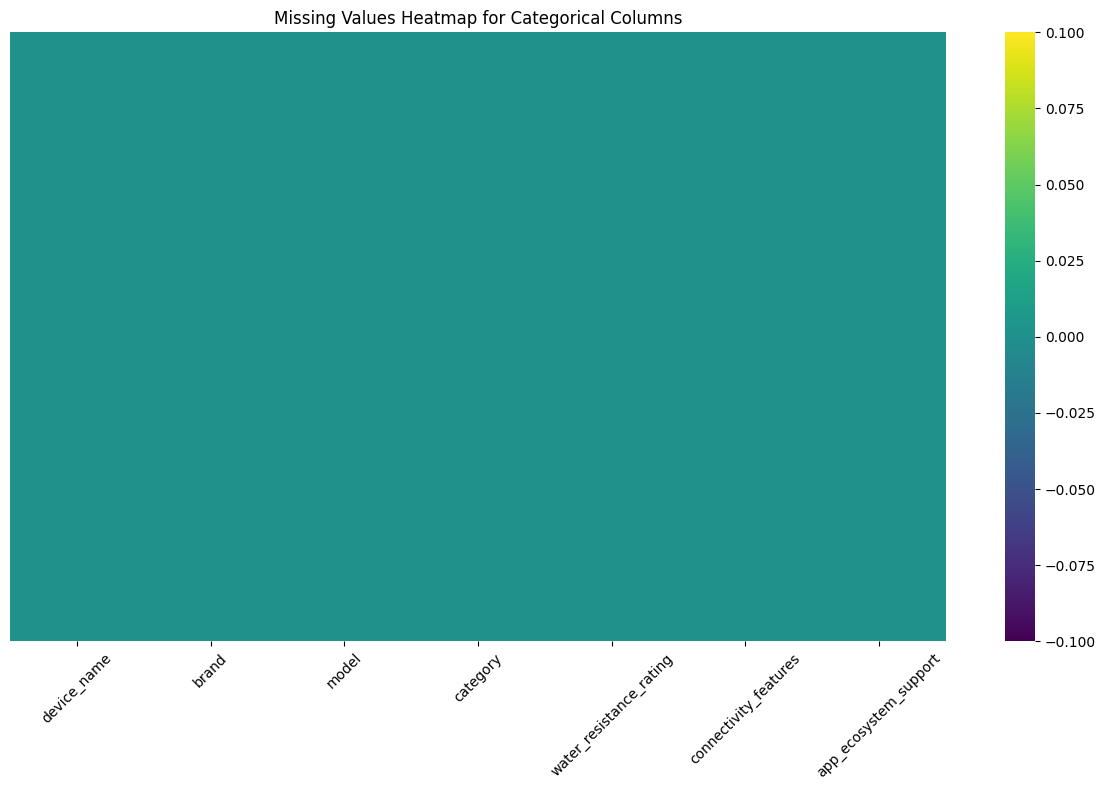

In [42]:
# Question 33: Heatmap of missing values
print("Question 33: Heatmap of missing values for specific columns")

categorical_cols_viz = ['device_name', 'brand', 'model', 'category', 'water_resistance_rating', 
                       'connectivity_features', 'app_ecosystem_support']

plt.figure(figsize=(12, 8))
missing_data = df[categorical_cols_viz].isnull()
sns.heatmap(missing_data, cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap for Categorical Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Question 34: Bar chart of missing values per column


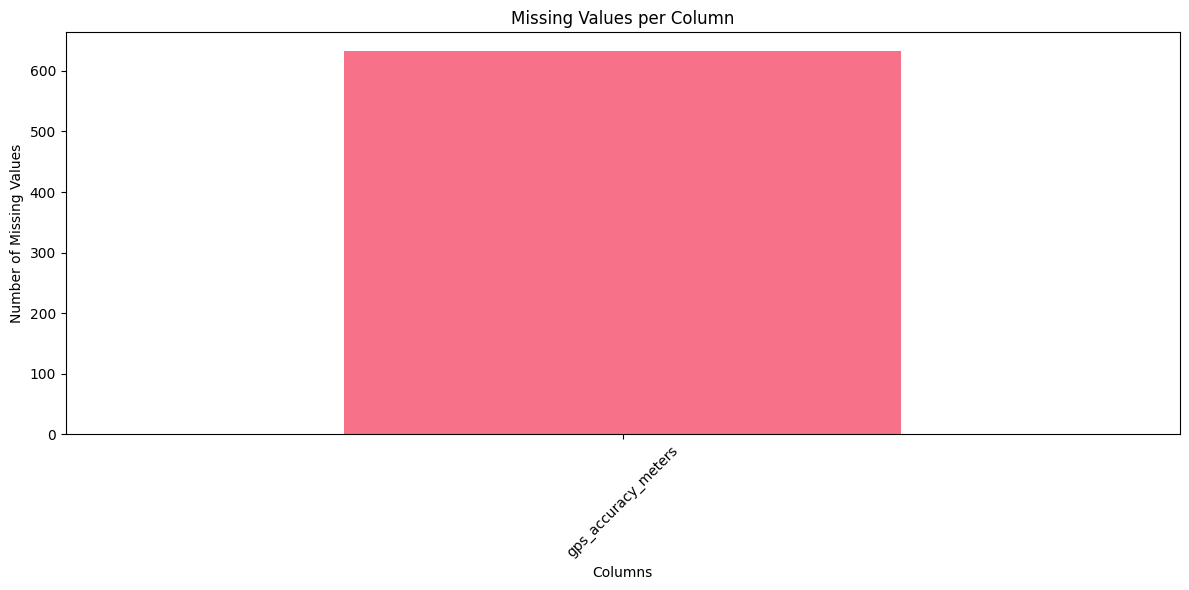

Observations: The GPS_Accuracy_Meters column has the most missing values, which is common in wearable devices that may not always have GPS functionality enabled.


In [43]:
# Question 34: Bar chart of missing values using pandas
print("Question 34: Bar chart of missing values per column")

missing_counts = df.isnull().sum()
missing_counts = missing_counts[missing_counts > 0]

plt.figure(figsize=(12, 6))
missing_counts.plot(kind='bar')
plt.title('Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Observations: The GPS_Accuracy_Meters column has the most missing values, which is common in wearable devices that may not always have GPS functionality enabled.")

Question 35: Missing data pattern using missingno library


<Figure size 1200x800 with 0 Axes>

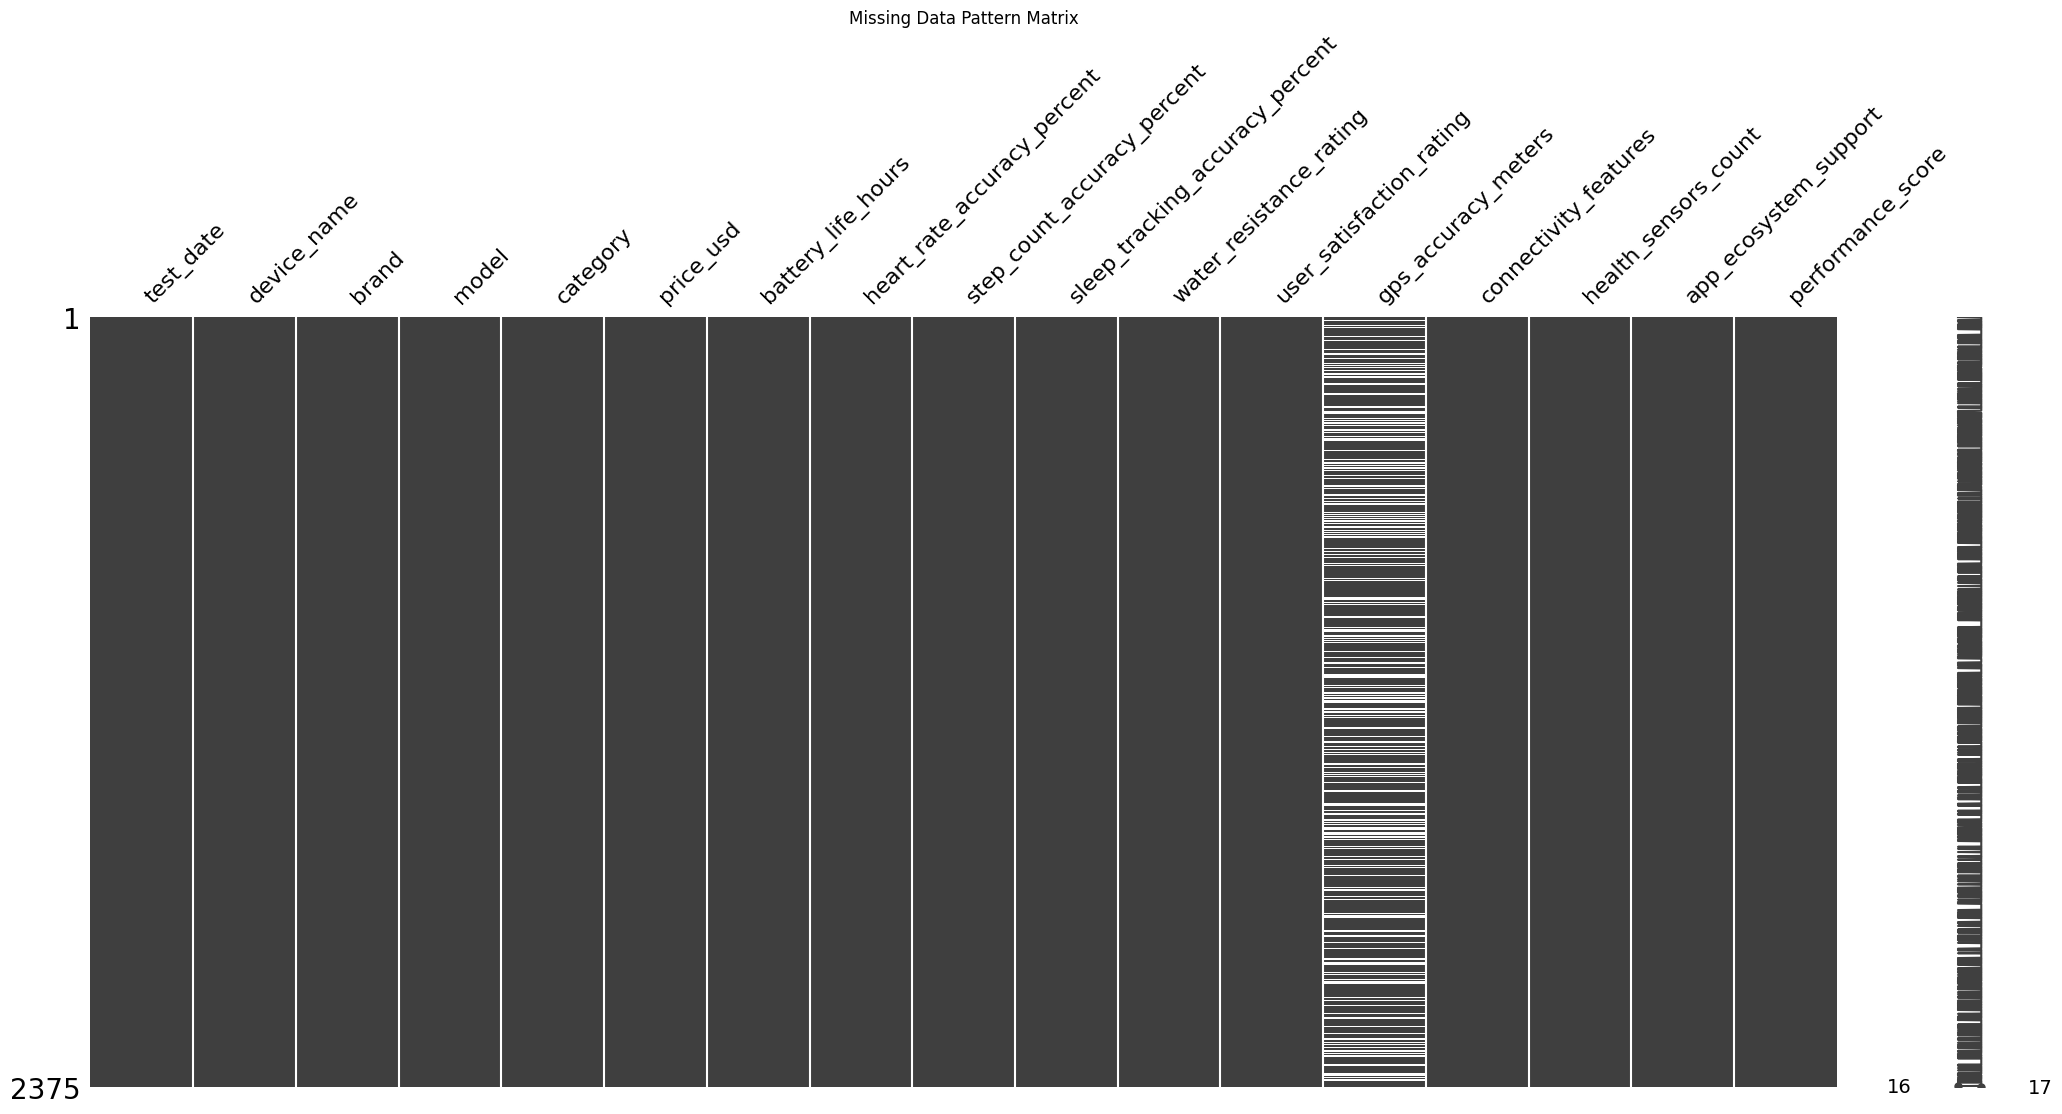

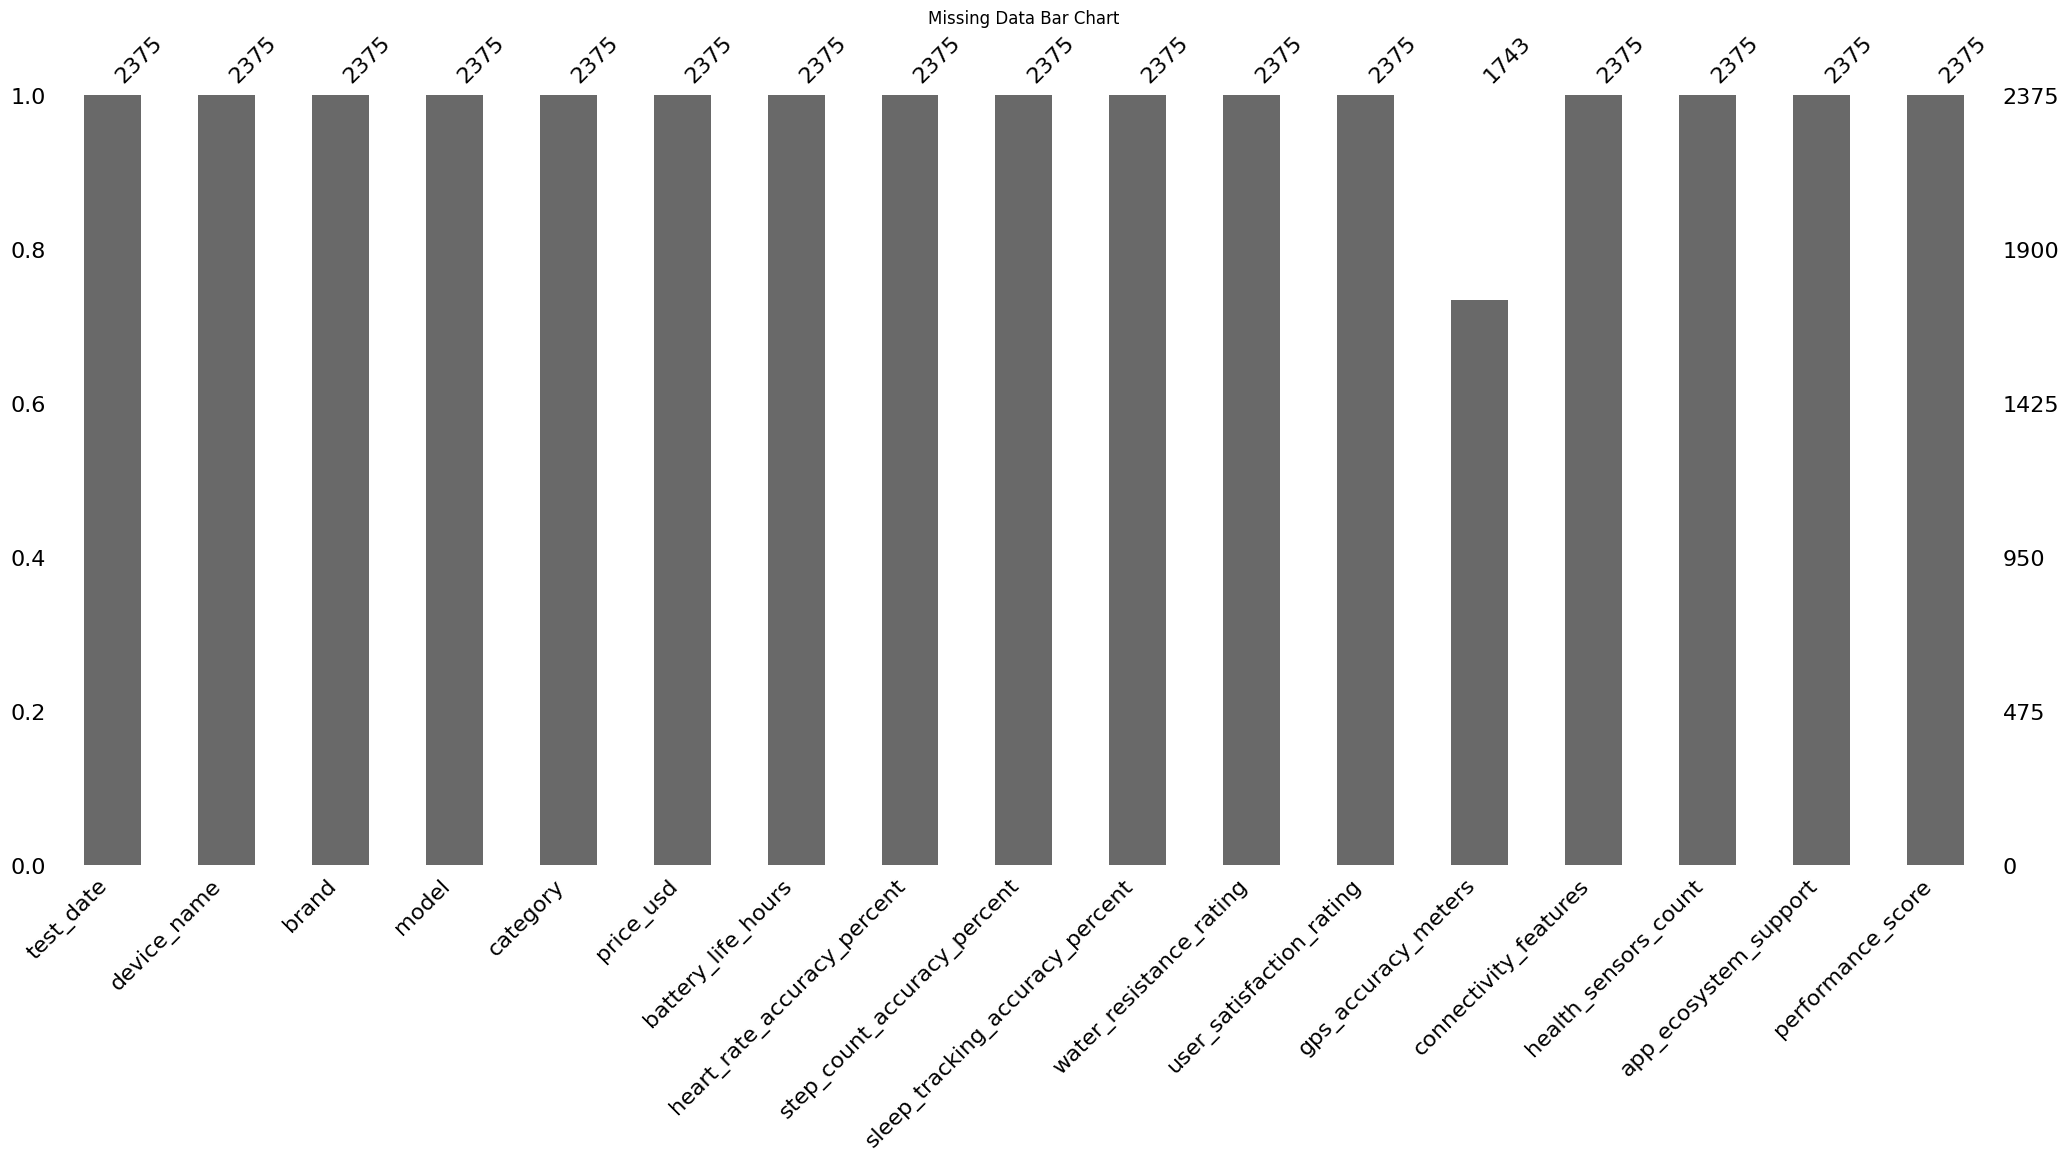

Observations: The missing data pattern shows that GPS_Accuracy_Meters has significant missing values, likely because not all wearable devices have GPS functionality or GPS data wasn't collected for all devices.


In [44]:
# Question 35: Missing data pattern visualization using missingno
print("Question 35: Missing data pattern using missingno library")

plt.figure(figsize=(12, 8))
msno.matrix(df)
plt.title('Missing Data Pattern Matrix')
plt.show()

plt.figure(figsize=(10, 6))
msno.bar(df)
plt.title('Missing Data Bar Chart')
plt.show()

print("Observations: The missing data pattern shows that GPS_Accuracy_Meters has significant missing values, likely because not all wearable devices have GPS functionality or GPS data wasn't collected for all devices.")

In [45]:
# Question 36: Approach for replacing missing GPS values
print("Question 36: Approach for replacing missing GPS_Accuracy_Meters values")

print("""
Suggested approach: Use median imputation for GPS_Accuracy_Meters

Justification:
1. GPS accuracy is a numerical measure that can vary widely between devices
2. Median is less sensitive to outliers than mean, making it more robust
3. GPS functionality varies by device type - some fitness trackers don't have GPS
4. Using median preserves the central tendency without being skewed by extreme values
5. It's a reasonable approximation for devices that should have GPS but are missing the measurement
""")

Question 36: Approach for replacing missing GPS_Accuracy_Meters values

Suggested approach: Use median imputation for GPS_Accuracy_Meters

Justification:
1. GPS accuracy is a numerical measure that can vary widely between devices
2. Median is less sensitive to outliers than mean, making it more robust
3. GPS functionality varies by device type - some fitness trackers don't have GPS
4. Using median preserves the central tendency without being skewed by extreme values
5. It's a reasonable approximation for devices that should have GPS but are missing the measurement



In [46]:
# Question 37: Replace missing GPS values with median
print("Question 37: Replacing missing GPS values with median")

# Calculate median before replacement
gps_median = df['gps_accuracy_meters'].median()
print(f"Median GPS accuracy: {gps_median}")

# Replace missing values
df['gps_accuracy_meters'].fillna(gps_median, inplace=True)

print(f"Missing values in GPS_Accuracy_Meters after replacement: {df['gps_accuracy_meters'].isnull().sum()}")

Question 37: Replacing missing GPS values with median
Median GPS accuracy: 3.2
Missing values in GPS_Accuracy_Meters after replacement: 0


In [47]:
# Question 38: Approach for User_Satisfaction_Rating missing values
print("Question 38: Approach for User_Satisfaction_Rating missing values")

user_satisfaction_missing = df['user_satisfaction_rating'].isnull().sum()
print(f"Missing values in User_Satisfaction_Rating: {user_satisfaction_missing}")

if user_satisfaction_missing > 0:
    print("""
    Suggested approach: Use mean imputation grouped by category
    
    Justification:
    1. User satisfaction ratings are typically normally distributed
    2. Different device categories may have different satisfaction patterns
    3. Mean provides a reasonable central estimate for missing ratings
    4. Grouping by category accounts for systematic differences between device types
    """)
else:
    print("No missing values found in User_Satisfaction_Rating column.")

Question 38: Approach for User_Satisfaction_Rating missing values
Missing values in User_Satisfaction_Rating: 0
No missing values found in User_Satisfaction_Rating column.


In [48]:
# Question 39: Verify no missing GPS values
print("Question 39: Verifying no missing GPS values after replacement")
remaining_gps_missing = df['gps_accuracy_meters'].isnull().sum()
print(f"Remaining missing values in GPS_Accuracy_Meters: {remaining_gps_missing}")

if remaining_gps_missing == 0:
    print("✓ Successfully removed all missing values from GPS_Accuracy_Meters column")
else:
    print("✗ Some missing values still remain")

Question 39: Verifying no missing GPS values after replacement
Remaining missing values in GPS_Accuracy_Meters: 0
✓ Successfully removed all missing values from GPS_Accuracy_Meters column


## (E). OUTLIER DETECTION AND HANDLING

In [49]:
# Question 40: Outliers in Price_USD using IQR method
print("Question 40: Outliers in Price_USD using IQR method")

def detect_outliers_iqr(series):
    """Detect outliers using IQR method"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers, lower_bound, upper_bound

price_outliers, price_lower, price_upper = detect_outliers_iqr(df['price_usd'])
print(f"Number of outliers in Price_USD: {len(price_outliers)}")
print(f"Outlier range: < {price_lower:.2f} or > {price_upper:.2f}")
print("First 10 outlier values:")
print(price_outliers.head(10).tolist())

Question 40: Outliers in Price_USD using IQR method
Number of outliers in Price_USD: 33
Outlier range: < -202.21 or > 902.01
First 10 outlier values:
[908.41, 903.67, 948.59, 961.93, 971.39, 945.8, 923.73, 964.83, 930.61, 989.48]


In [50]:
# Question 41: Outliers in Battery_Life_Hours
print("Question 41: Outliers in Battery_Life_Hours using IQR method")

battery_outliers, battery_lower, battery_upper = detect_outliers_iqr(df['battery_life_hours'])
print(f"Number of outliers in Battery_Life_Hours: {len(battery_outliers)}")
print(f"Outlier range: < {battery_lower:.2f} or > {battery_upper:.2f}")
print("First 10 outlier values:")
print(battery_outliers.head(10).tolist())

Question 41: Outliers in Battery_Life_Hours using IQR method
Number of outliers in Battery_Life_Hours: 199
Outlier range: < -148.85 or > 373.15
First 10 outlier values:
[589.9, 459.6, 644.7, 512.5, 537.9, 610.6, 700.4, 712.4, 667.0, 513.5]


In [51]:
# Question 42: Outliers in Heart_Rate_Accuracy_Percent
print("Question 42: Outliers in Heart_Rate_Accuracy_Percent using IQR method")

hr_outliers, hr_lower, hr_upper = detect_outliers_iqr(df['heart_rate_accuracy_percent'])
print(f"Number of outliers in Heart_Rate_Accuracy_Percent: {len(hr_outliers)}")
print(f"Outlier range: < {hr_lower:.2f} or > {hr_upper:.2f}")
print("First 10 outlier values:")
print(hr_outliers.head(10).tolist())

Question 42: Outliers in Heart_Rate_Accuracy_Percent using IQR method
Number of outliers in Heart_Rate_Accuracy_Percent: 87
Outlier range: < 86.46 or > 101.60
First 10 outlier values:
[86.2, 85.39, 85.32, 85.97, 85.42, 85.35, 85.72, 86.44, 86.11, 85.33]


In [52]:
# Question 43: Outliers in Step_Count_Accuracy_Percent
print("Question 43: Outliers in Step_Count_Accuracy_Percent using IQR method")

step_outliers, step_lower, step_upper = detect_outliers_iqr(df['step_count_accuracy_percent'])
print(f"Number of outliers in Step_Count_Accuracy_Percent: {len(step_outliers)}")
print(f"Outlier range: < {step_lower:.2f} or > {step_upper:.2f}")
print("First 10 outlier values:")
print(step_outliers.head(10).tolist())

Question 43: Outliers in Step_Count_Accuracy_Percent using IQR method
Number of outliers in Step_Count_Accuracy_Percent: 0
Outlier range: < 90.94 or > 100.57
First 10 outlier values:
[]


In [53]:
# Question 44: Outliers in Sleep_Tracking_Accuracy_Percent
print("Question 44: Outliers in Sleep_Tracking_Accuracy_Percent using IQR method")

sleep_outliers, sleep_lower, sleep_upper = detect_outliers_iqr(df['sleep_tracking_accuracy_percent'])
print(f"Number of outliers in Sleep_Tracking_Accuracy_Percent: {len(sleep_outliers)}")
print(f"Outlier range: < {sleep_lower:.2f} or > {sleep_upper:.2f}")
print("First 10 outlier values:")
print(sleep_outliers.head(10).tolist())

Question 44: Outliers in Sleep_Tracking_Accuracy_Percent using IQR method
Number of outliers in Sleep_Tracking_Accuracy_Percent: 21
Outlier range: < 66.13 or > 91.41
First 10 outlier values:
[91.48, 91.73, 91.6, 91.71, 91.97, 91.93, 91.6, 91.97, 91.64, 91.48]


In [54]:
# Question 45: Outliers in Performance_Score
print("Question 45: Outliers in Performance_Score using IQR method")

perf_outliers, perf_lower, perf_upper = detect_outliers_iqr(df['performance_score'])
print(f"Number of outliers in Performance_Score: {len(perf_outliers)}")
print(f"Outlier range: < {perf_lower:.2f} or > {perf_upper:.2f}")
print("First 10 outlier values:")
print(perf_outliers.head(10).tolist())

Question 45: Outliers in Performance_Score using IQR method
Number of outliers in Performance_Score: 0
Outlier range: < 49.45 or > 78.65
First 10 outlier values:
[]


In [55]:
# Question 46: Remove outliers from all numerical columns
print("Question 46: Code to remove outliers from all numerical columns using IQR method")

def remove_outliers_iqr(df, columns):
    """Remove outliers from specified columns using IQR method"""
    df_clean = df.copy()
    
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Create a clean dataset without outliers
numerical_columns = ['price_usd', 'battery_life_hours', 'heart_rate_accuracy_percent', 
                    'step_count_accuracy_percent', 'sleep_tracking_accuracy_percent', 
                    'gps_accuracy_meters', 'health_sensors_count', 'performance_score']

df_no_outliers = remove_outliers_iqr(df, numerical_columns)

print("Code to remove outliers:")
print("""
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean
""")

Question 46: Code to remove outliers from all numerical columns using IQR method
Code to remove outliers:

def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean



In [56]:
# Question 47: Sample size after removing outliers
print("Question 47: Sample size after removing outliers")

print(f"Original dataset size: {len(df)}")
print(f"Dataset size after removing outliers: {len(df_no_outliers)}")
print(f"Number of rows removed: {len(df) - len(df_no_outliers)}")
print(f"Percentage of data retained: {(len(df_no_outliers) / len(df)) * 100:.2f}%")

Question 47: Sample size after removing outliers
Original dataset size: 2375
Dataset size after removing outliers: 2125
Number of rows removed: 250
Percentage of data retained: 89.47%


Question 48: Box plots for numerical columns BEFORE removing outliers


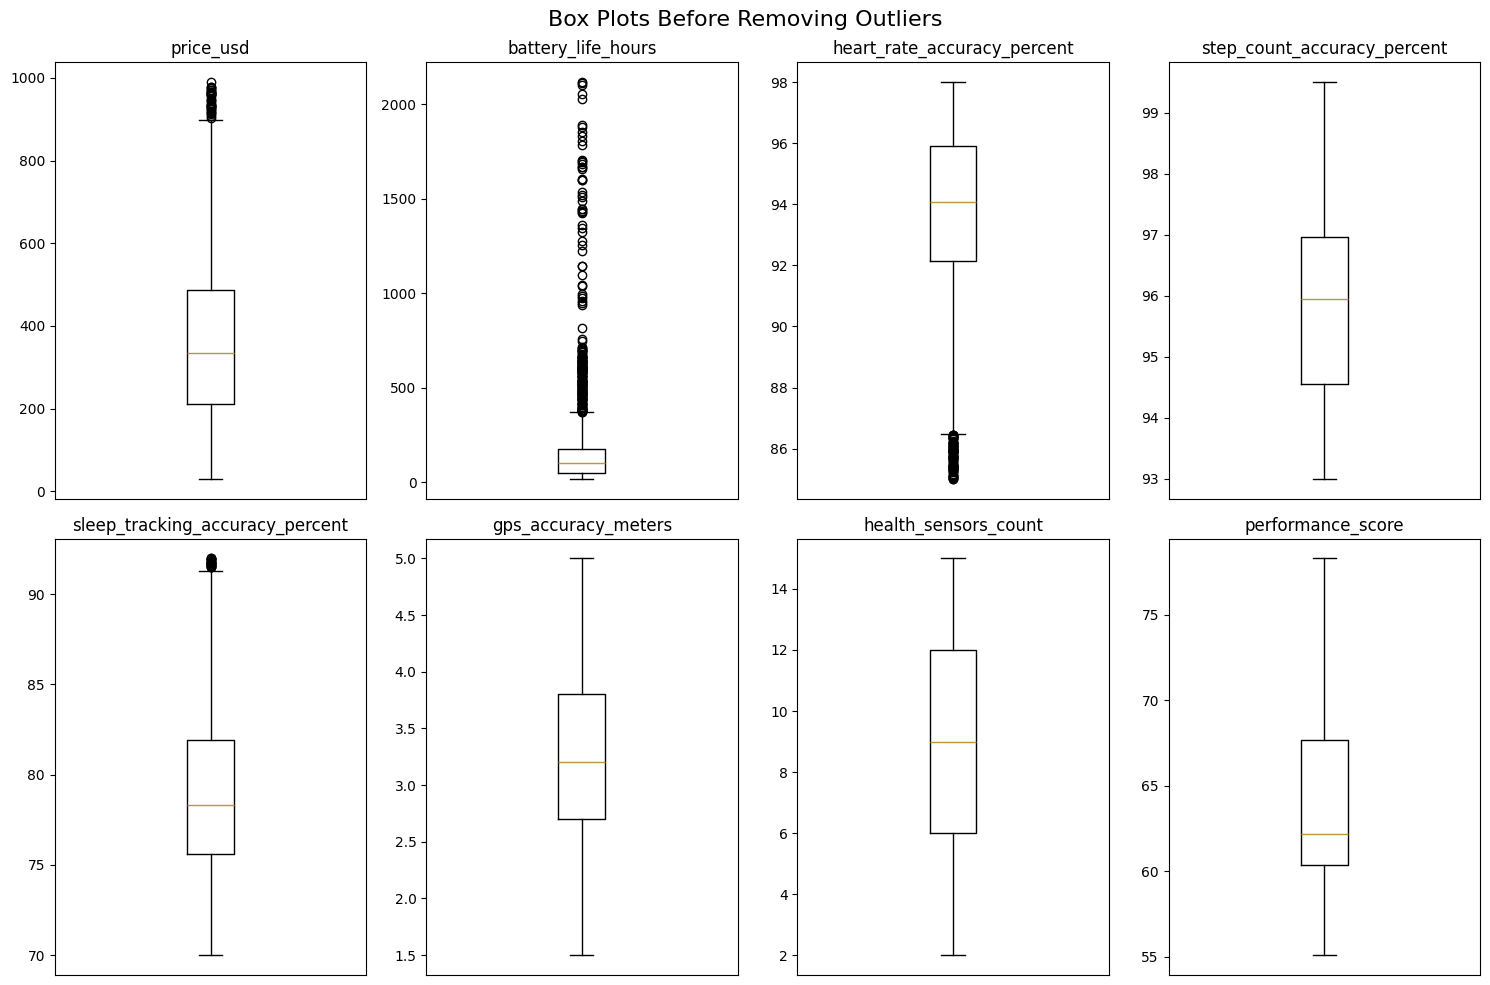

In [57]:
# Question 48: Box plots before removing outliers
print("Question 48: Box plots for numerical columns BEFORE removing outliers")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df[col].dropna())
    plt.title(f'{col}')
    plt.xticks([])

plt.suptitle('Box Plots Before Removing Outliers', fontsize=16)
plt.tight_layout()
plt.show()

Question 49: Box plots for numerical columns AFTER removing outliers


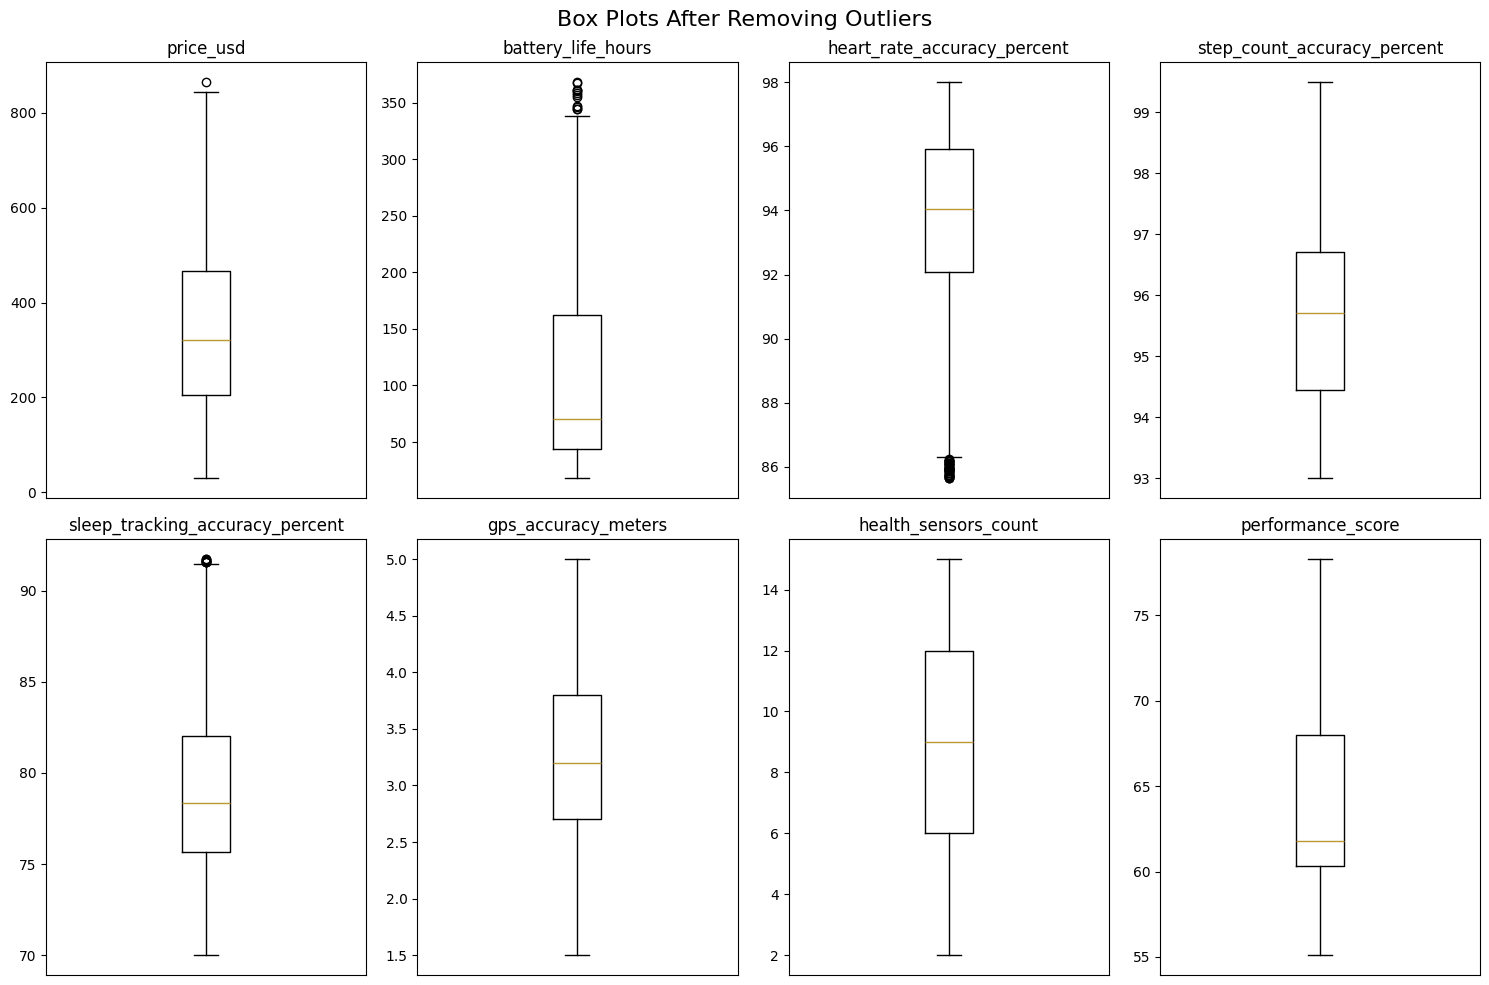


Comments on differences:
1. The box plots after outlier removal show more compact distributions
2. Extreme values that were skewing the data have been removed
3. The interquartile ranges are more clearly visible
4. The data distributions appear more normalized and less skewed
5. This makes the data more suitable for statistical analysis and modeling



In [58]:
# Question 49: Box plots after removing outliers
print("Question 49: Box plots for numerical columns AFTER removing outliers")

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    plt.boxplot(df_no_outliers[col].dropna())
    plt.title(f'{col}')
    plt.xticks([])

plt.suptitle('Box Plots After Removing Outliers', fontsize=16)
plt.tight_layout()
plt.show()

print("""
Comments on differences:
1. The box plots after outlier removal show more compact distributions
2. Extreme values that were skewing the data have been removed
3. The interquartile ranges are more clearly visible
4. The data distributions appear more normalized and less skewed
5. This makes the data more suitable for statistical analysis and modeling
""")

## (F). VISUALIZATION

Question 50: Histogram for Price_USD with 50 bins and KDE curve


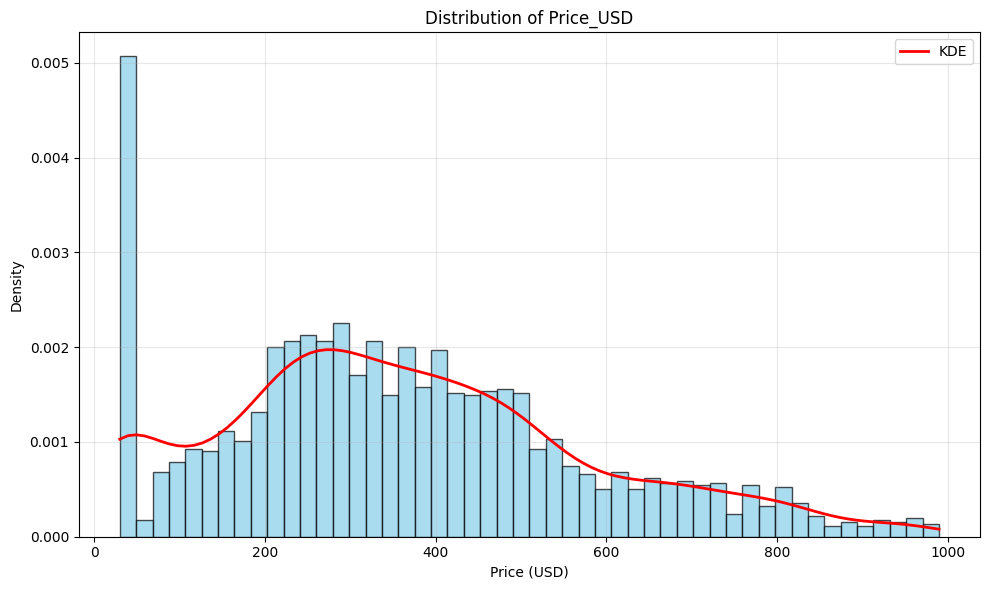

In [59]:
# Question 50: Histogram for Price_USD
print("Question 50: Histogram for Price_USD with 50 bins and KDE curve")

plt.figure(figsize=(10, 6))
plt.hist(df['price_usd'].dropna(), bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')

# Add KDE curve
from scipy.stats import gaussian_kde
data = df['price_usd'].dropna()
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

plt.title('Distribution of Price_USD')
plt.xlabel('Price (USD)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 51: Histogram for Battery_Life_Hours with 50 bins and KDE curve


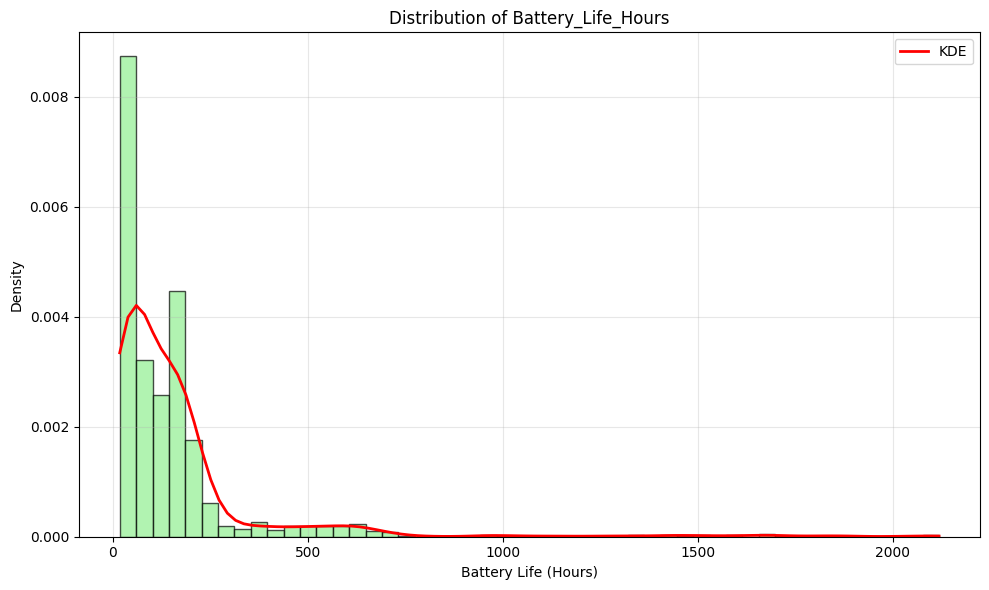

In [60]:
# Question 51: Histogram for Battery_Life_Hours
print("Question 51: Histogram for Battery_Life_Hours with 50 bins and KDE curve")

plt.figure(figsize=(10, 6))
plt.hist(df['battery_life_hours'].dropna(), bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')

# Add KDE curve
data = df['battery_life_hours'].dropna()
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

plt.title('Distribution of Battery_Life_Hours')
plt.xlabel('Battery Life (Hours)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 52: Histogram for Heart_Rate_Accuracy_Percent with 50 bins and KDE curve


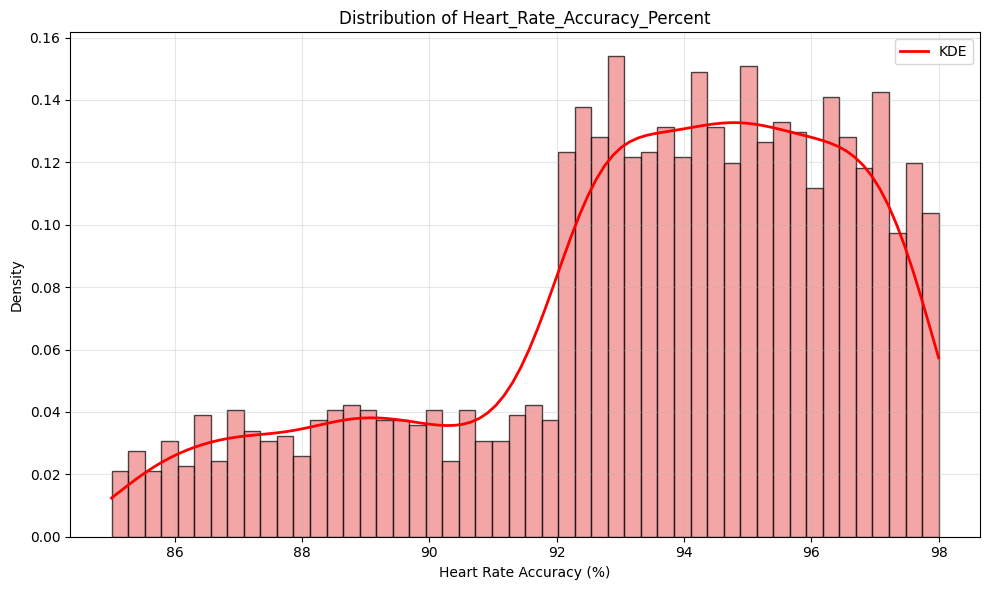

In [61]:
# Question 52: Histogram for Heart_Rate_Accuracy_Percent
print("Question 52: Histogram for Heart_Rate_Accuracy_Percent with 50 bins and KDE curve")

plt.figure(figsize=(10, 6))
plt.hist(df['heart_rate_accuracy_percent'].dropna(), bins=50, density=True, alpha=0.7, color='lightcoral', edgecolor='black')

# Add KDE curve
data = df['heart_rate_accuracy_percent'].dropna()
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

plt.title('Distribution of Heart_Rate_Accuracy_Percent')
plt.xlabel('Heart Rate Accuracy (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 53: Histogram for Step_Count_Accuracy_Percent with 50 bins and KDE curve


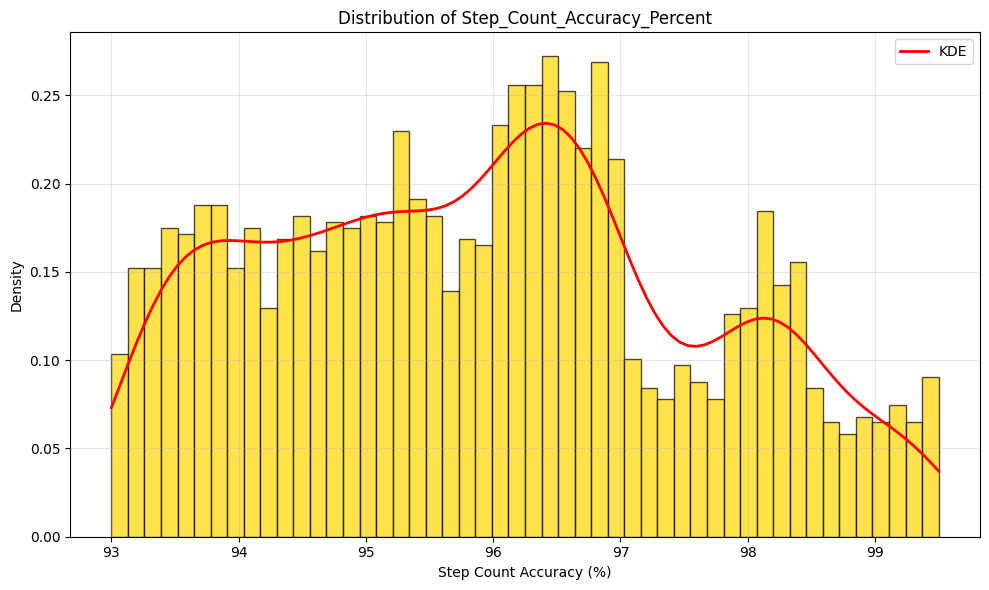

In [62]:
# Question 53: Histogram for Step_Count_Accuracy_Percent
print("Question 53: Histogram for Step_Count_Accuracy_Percent with 50 bins and KDE curve")

plt.figure(figsize=(10, 6))
plt.hist(df['step_count_accuracy_percent'].dropna(), bins=50, density=True, alpha=0.7, color='gold', edgecolor='black')

# Add KDE curve
data = df['step_count_accuracy_percent'].dropna()
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

plt.title('Distribution of Step_Count_Accuracy_Percent')
plt.xlabel('Step Count Accuracy (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 54: Histogram for Sleep_Tracking_Accuracy_Percent with 50 bins and KDE curve


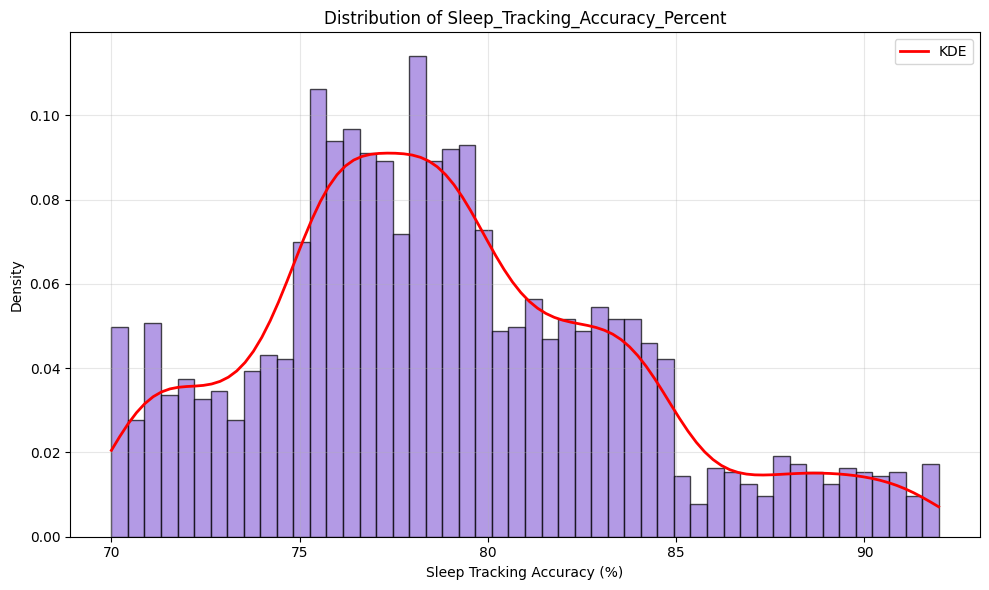

In [63]:
# Question 54: Histogram for Sleep_Tracking_Accuracy_Percent
print("Question 54: Histogram for Sleep_Tracking_Accuracy_Percent with 50 bins and KDE curve")

plt.figure(figsize=(10, 6))
plt.hist(df['sleep_tracking_accuracy_percent'].dropna(), bins=50, density=True, alpha=0.7, color='mediumpurple', edgecolor='black')

# Add KDE curve
data = df['sleep_tracking_accuracy_percent'].dropna()
kde = gaussian_kde(data)
x_range = np.linspace(data.min(), data.max(), 100)
plt.plot(x_range, kde(x_range), 'r-', linewidth=2, label='KDE')

plt.title('Distribution of Sleep_Tracking_Accuracy_Percent')
plt.xlabel('Sleep Tracking Accuracy (%)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 55: Bar plot showing average User_Satisfaction_Rating by Category


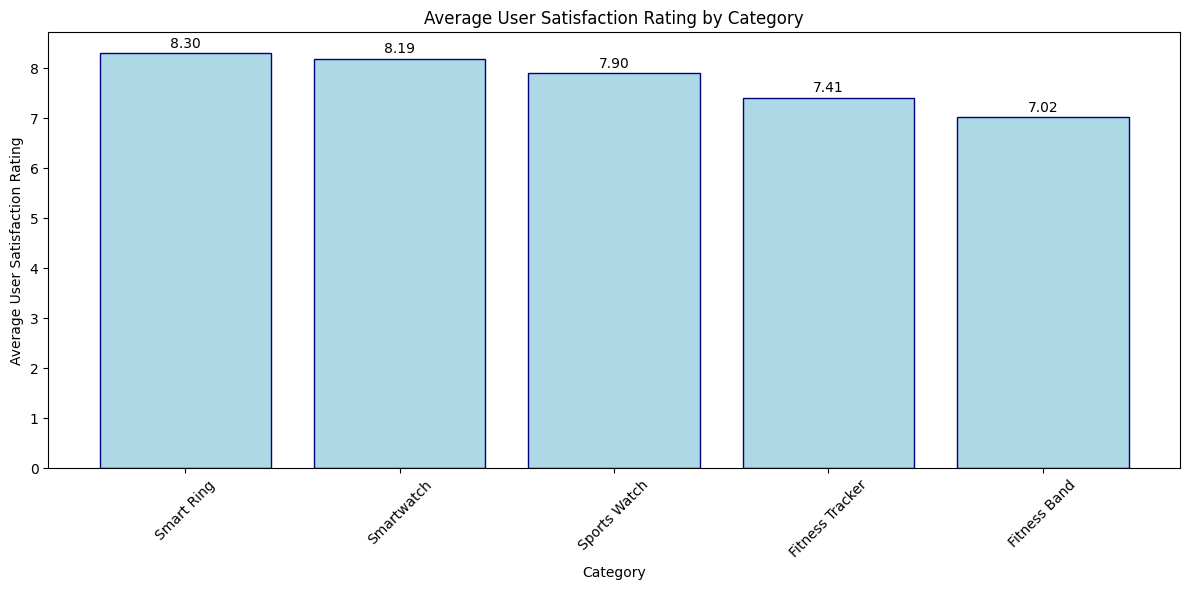

In [64]:
# Question 55: Bar plot of average User_Satisfaction_Rating by Category
print("Question 55: Bar plot showing average User_Satisfaction_Rating by Category")

avg_satisfaction_by_category = df.groupby('category')['user_satisfaction_rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(avg_satisfaction_by_category.index, avg_satisfaction_by_category.values, color='lightblue', edgecolor='navy')
plt.title('Average User Satisfaction Rating by Category')
plt.xlabel('Category')
plt.ylabel('Average User Satisfaction Rating')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, value in zip(bars, avg_satisfaction_by_category.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
             f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Question 56: Bar plot showing average Performance_Score by Brand


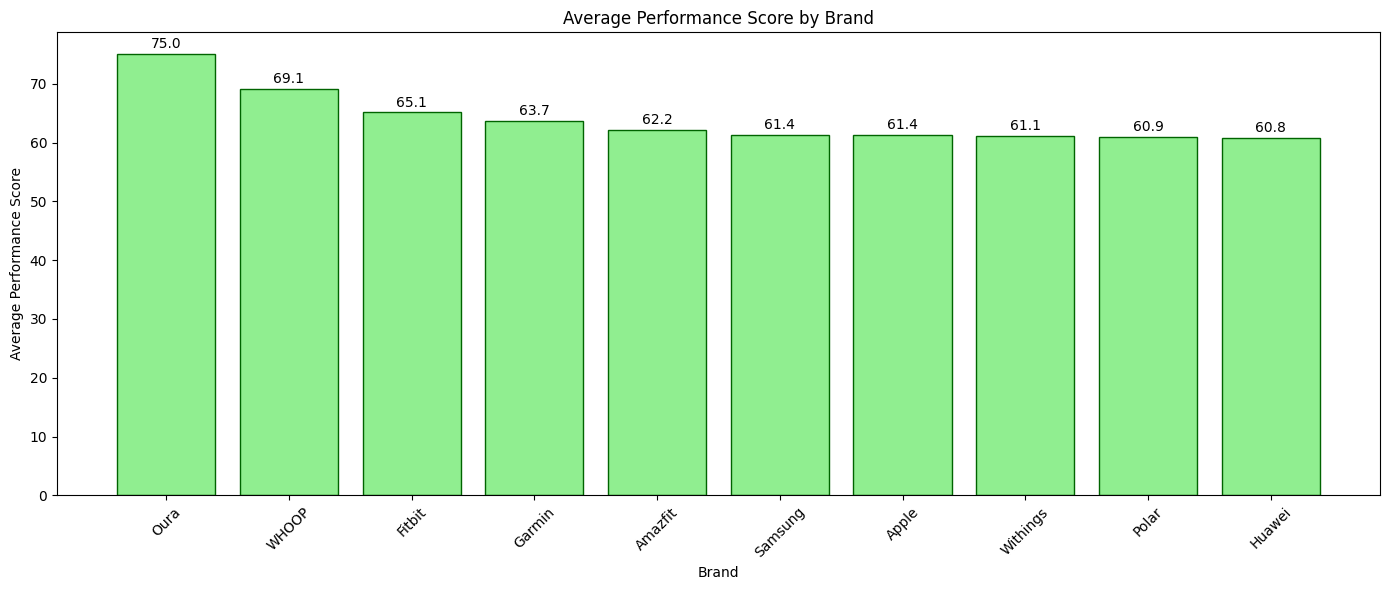

In [65]:
# Question 56: Bar plot of average Performance_Score by Brand
print("Question 56: Bar plot showing average Performance_Score by Brand")

avg_performance_by_brand = df.groupby('brand')['performance_score'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
bars = plt.bar(avg_performance_by_brand.index, avg_performance_by_brand.values, color='lightgreen', edgecolor='darkgreen')
plt.title('Average Performance Score by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Performance Score')
plt.xticks(rotation=45)

# Add value labels on bars
for bar, value in zip(bars, avg_performance_by_brand.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{value:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Question 57: Box plot showing distribution of Price_USD by Category


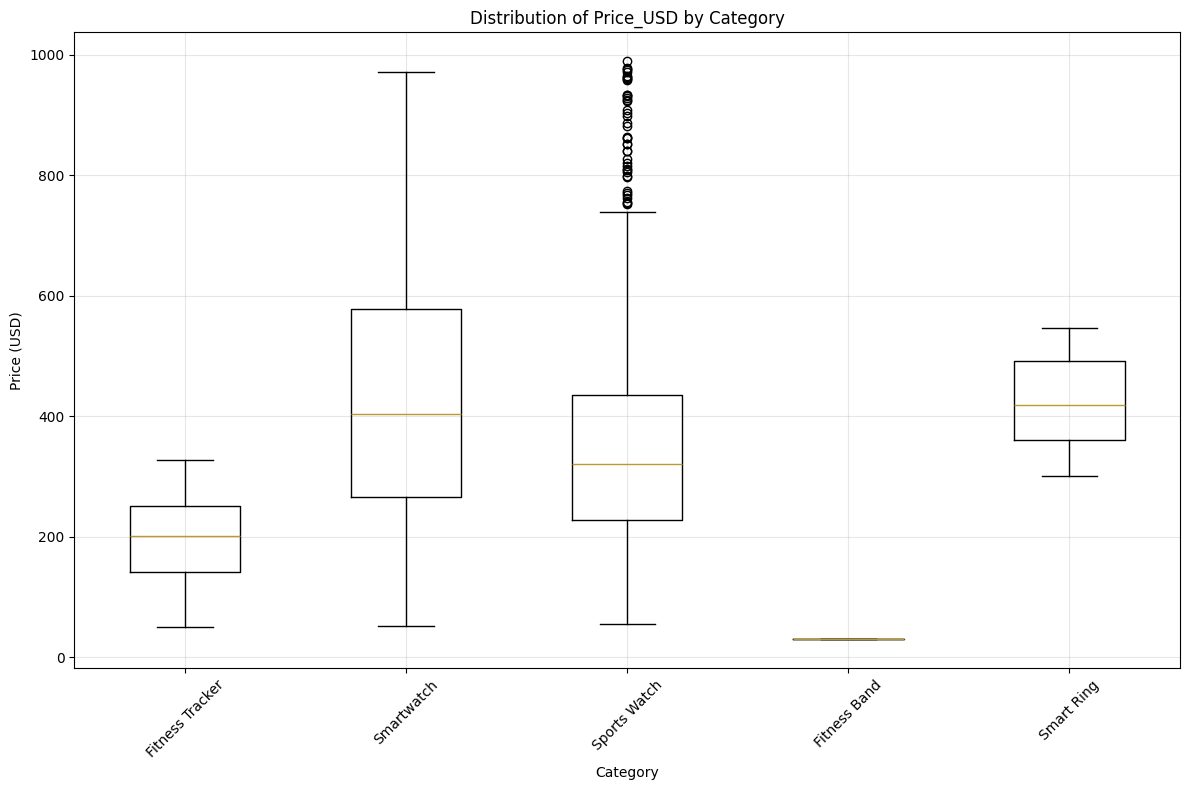

In [66]:
# Question 57: Box plot of Price_USD by Category
print("Question 57: Box plot showing distribution of Price_USD by Category")

plt.figure(figsize=(12, 8))
categories = df['category'].unique()
price_data = [df[df['category'] == cat]['price_usd'].dropna() for cat in categories]

plt.boxplot(price_data, labels=categories)
plt.title('Distribution of Price_USD by Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 58: Box plot showing distribution of Battery_Life_Hours by Brand


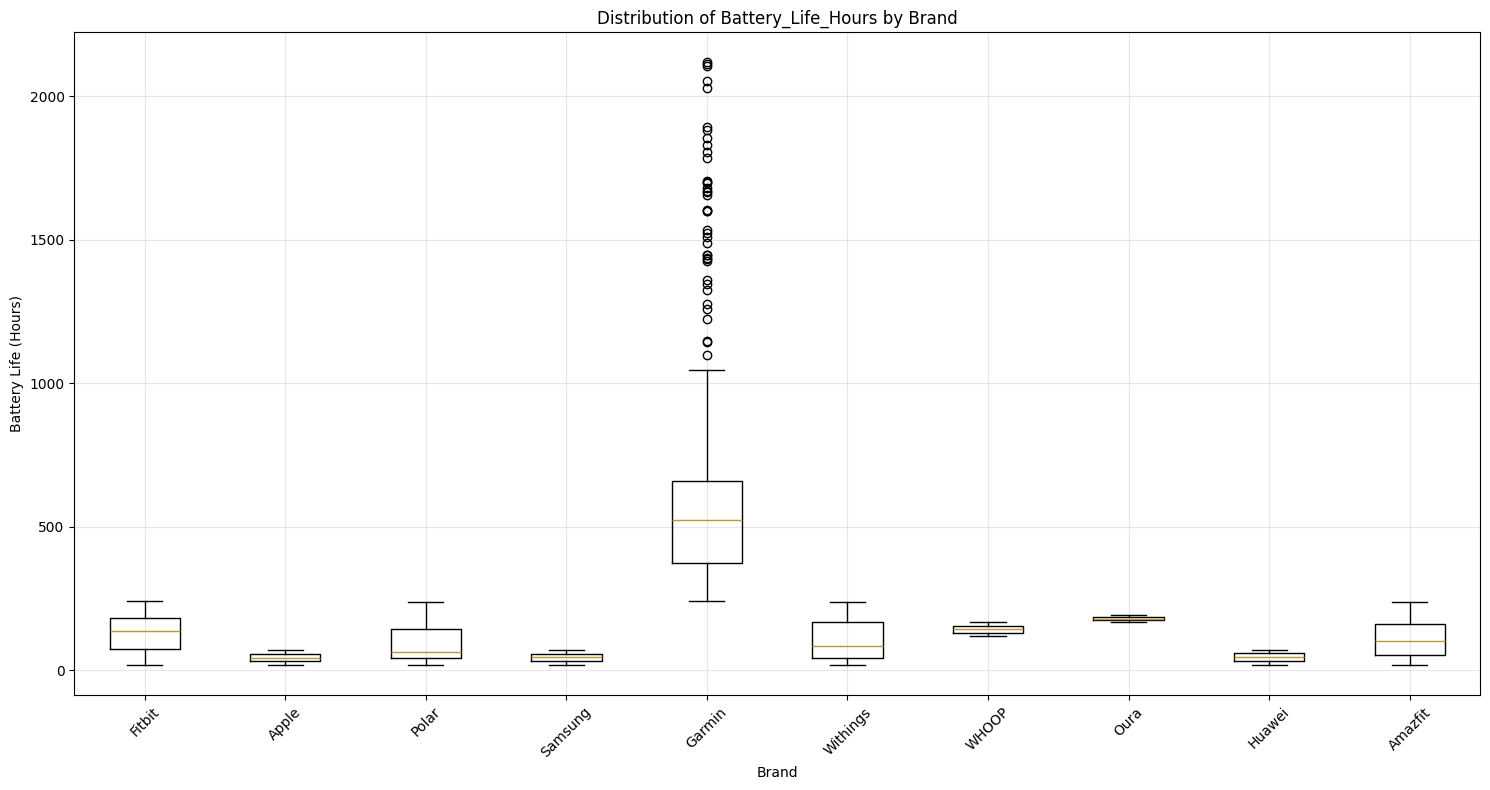

In [67]:
# Question 58: Box plot of Battery_Life_Hours by Brand
print("Question 58: Box plot showing distribution of Battery_Life_Hours by Brand")

plt.figure(figsize=(15, 8))
brands = df['brand'].unique()
battery_data = [df[df['brand'] == brand]['battery_life_hours'].dropna() for brand in brands]

plt.boxplot(battery_data, labels=brands)
plt.title('Distribution of Battery_Life_Hours by Brand')
plt.xlabel('Brand')
plt.ylabel('Battery Life (Hours)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 59: Scatter plot of Heart_Rate_Accuracy_Percent vs Step_Count_Accuracy_Percent, colored by Category


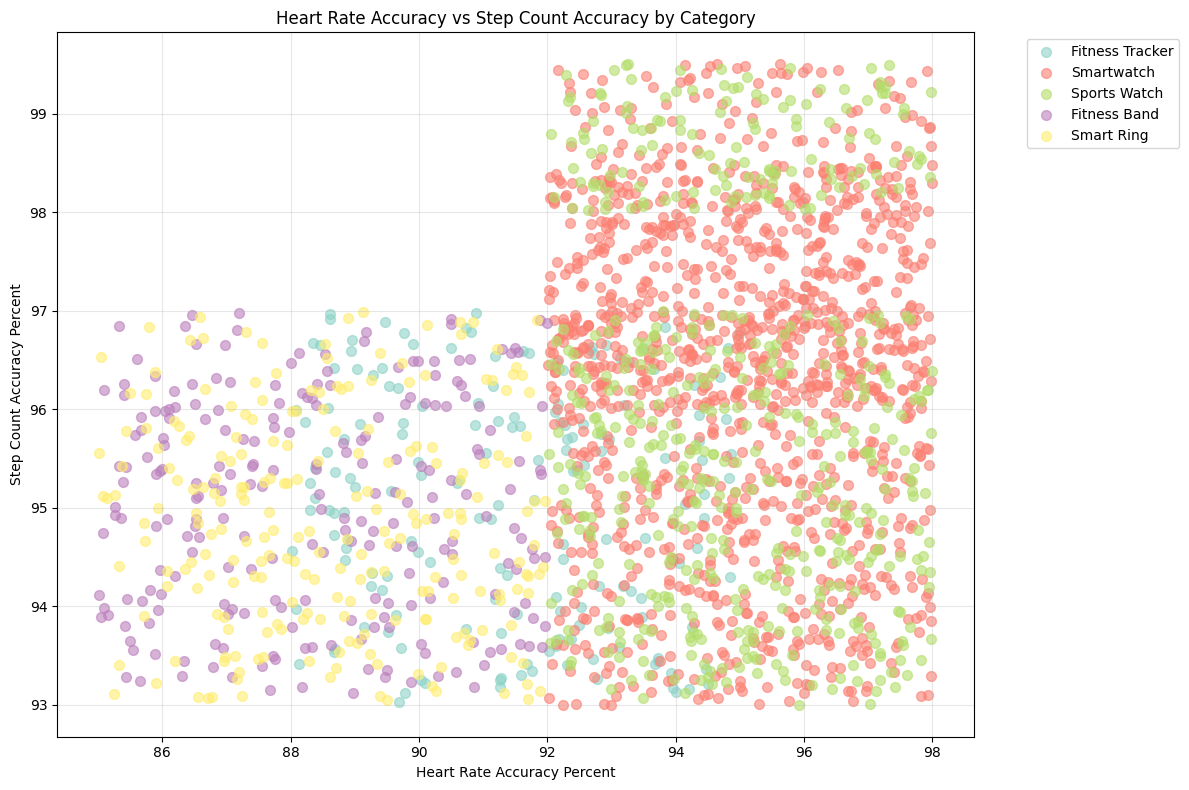

In [68]:
# Question 59: Scatter plot of Heart Rate vs Step Count Accuracy, colored by Category
print("Question 59: Scatter plot of Heart_Rate_Accuracy_Percent vs Step_Count_Accuracy_Percent, colored by Category")

plt.figure(figsize=(12, 8))
categories = df['category'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    category_data = df[df['category'] == category]
    plt.scatter(category_data['heart_rate_accuracy_percent'], 
               category_data['step_count_accuracy_percent'],
               c=[colors[i]], label=category, alpha=0.6, s=50)

plt.xlabel('Heart Rate Accuracy Percent')
plt.ylabel('Step Count Accuracy Percent')
plt.title('Heart Rate Accuracy vs Step Count Accuracy by Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## (G). CORRELATION ANALYSIS

Question 60: Lower triangle correlation heatmap for numerical columns


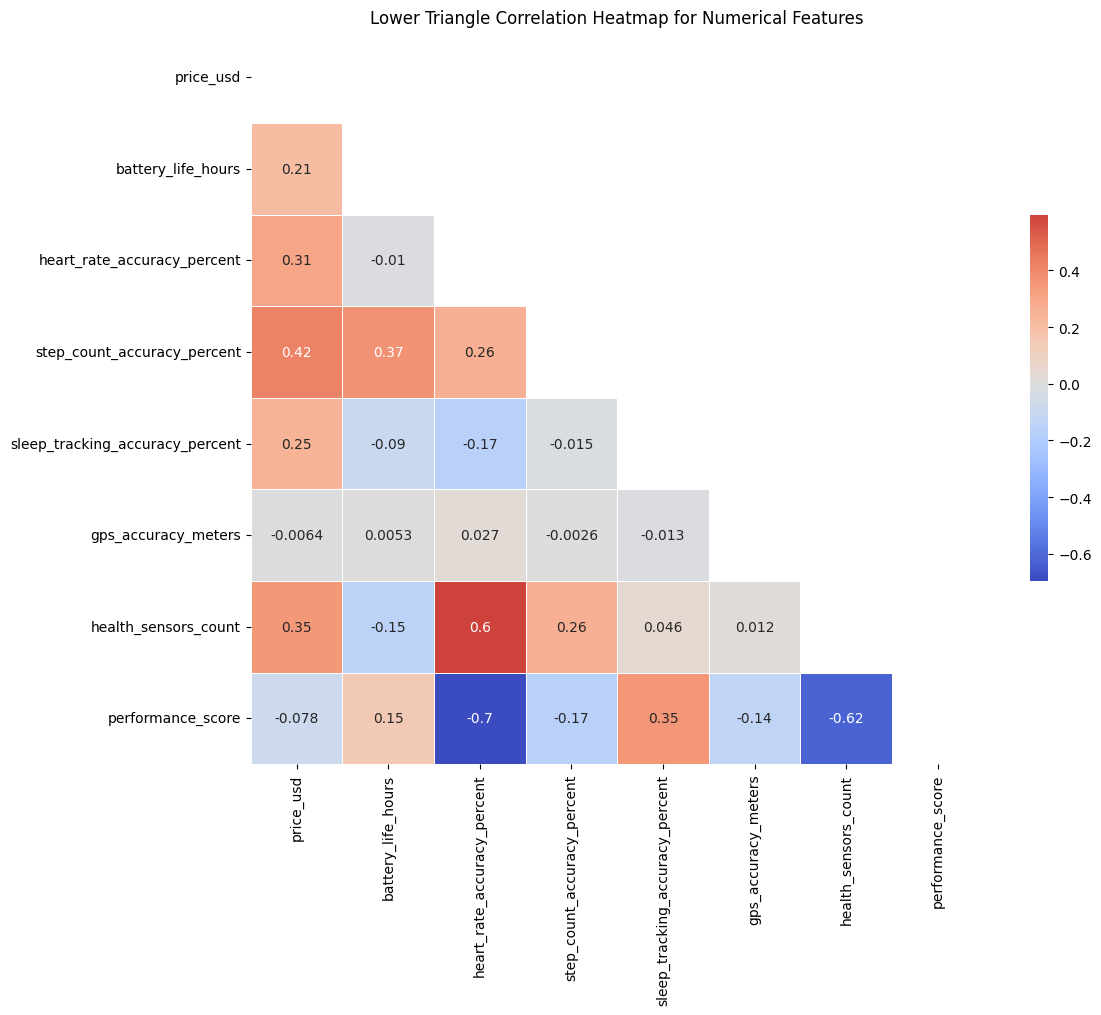

In [69]:
# Question 60: Lower triangle correlation heatmap
print("Question 60: Lower triangle correlation heatmap for numerical columns")

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create mask for lower triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Lower Triangle Correlation Heatmap for Numerical Features')
plt.tight_layout()
plt.show()

In [70]:
# Question 61: Correlation between Heart Rate and Step Count Accuracy
print("Question 61: Correlation between Heart_Rate_Accuracy_Percent and Step_Count_Accuracy_Percent")

correlation_hr_step = df['heart_rate_accuracy_percent'].corr(df['step_count_accuracy_percent'])
print(f"Correlation coefficient: {correlation_hr_step:.4f}")

Question 61: Correlation between Heart_Rate_Accuracy_Percent and Step_Count_Accuracy_Percent
Correlation coefficient: 0.2608


In [71]:
# Question 62: Correlation between Price_USD and Performance_Score
print("Question 62: Correlation between Price_USD and Performance_Score")

correlation_price_perf = df['price_usd'].corr(df['performance_score'])
print(f"Correlation coefficient: {correlation_price_perf:.4f}")

Question 62: Correlation between Price_USD and Performance_Score
Correlation coefficient: -0.0778


In [72]:
# Question 63: Correlation between Battery_Life_Hours and User_Satisfaction_Rating
print("Question 63: Correlation between Battery_Life_Hours and User_Satisfaction_Rating")

correlation_battery_satisfaction = df['battery_life_hours'].corr(df['user_satisfaction_rating'])
print(f"Correlation coefficient: {correlation_battery_satisfaction:.4f}")

Question 63: Correlation between Battery_Life_Hours and User_Satisfaction_Rating
Correlation coefficient: 0.1065


Question 64: Pairplot for numerical columns colored by Category


<Figure size 1500x1500 with 0 Axes>

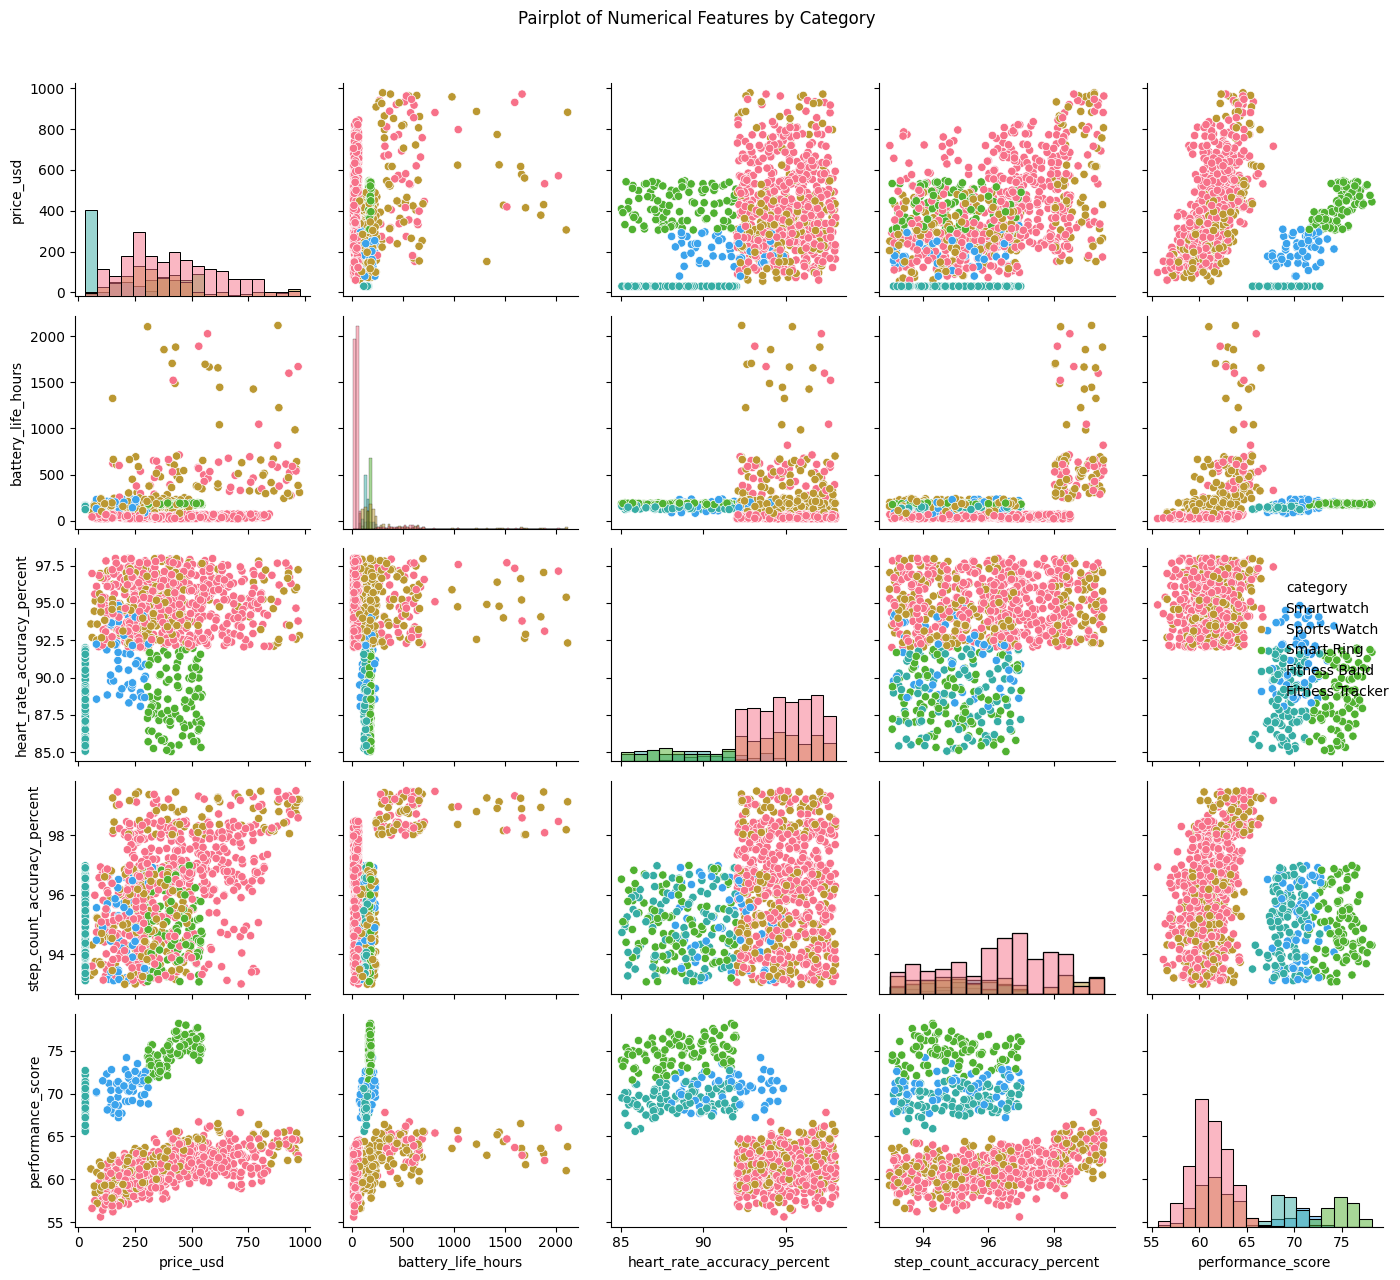

In [73]:
# Question 64: Pairplot for numerical columns colored by Category
print("Question 64: Pairplot for numerical columns colored by Category")

# Select subset of numerical columns for pairplot (to keep it manageable)
pairplot_cols = ['price_usd', 'battery_life_hours', 'heart_rate_accuracy_percent', 
                'step_count_accuracy_percent', 'performance_score']

# Create a sample for visualization (pairplot can be slow with large datasets)
df_sample = df.sample(n=min(1000, len(df)), random_state=42)

plt.figure(figsize=(15, 15))
sns.pairplot(df_sample[pairplot_cols + ['category']], hue='category', diag_kind='hist')
plt.suptitle('Pairplot of Numerical Features by Category', y=1.02)
plt.tight_layout()
plt.show()

In [74]:
# Question 65: Features with highest positive correlation with Performance_Score
print("Question 65: Features with highest positive correlation with Performance_Score")

perf_correlations = df[numerical_columns].corr()['performance_score'].drop('performance_score')
positive_correlations = perf_correlations[perf_correlations > 0].sort_values(ascending=False)

print("Features with highest positive correlation with Performance_Score:")
for feature, corr in positive_correlations.head().items():
    print(f"{feature}: {corr:.4f}")

Question 65: Features with highest positive correlation with Performance_Score
Features with highest positive correlation with Performance_Score:
sleep_tracking_accuracy_percent: 0.3540
battery_life_hours: 0.1523


In [77]:
# Question 66: Features with highest negative correlation with User_Satisfaction_Rating
print("Question 66: Features with highest negative correlation with User_Satisfaction_Rating")

# Update numerical_columns to include user_satisfaction_rating
numerical_columns_with_satisfaction = numerical_columns + ['user_satisfaction_rating']

# Calculate correlation matrix with all numerical columns including user_satisfaction_rating
correlation_matrix_full = df[numerical_columns_with_satisfaction].corr()

# Get correlations with user_satisfaction_rating
satisfaction_correlations = correlation_matrix_full['user_satisfaction_rating'].drop('user_satisfaction_rating')
negative_correlations = satisfaction_correlations[satisfaction_correlations < 0].sort_values()

print("Features with highest negative correlation with User_Satisfaction_Rating:")
if len(negative_correlations) > 0:
    for feature, corr in negative_correlations.head().items():
        print(f"{feature}: {corr:.4f}")
else:
    print("No negative correlations found with User_Satisfaction_Rating")
    print("\nAll correlations with User_Satisfaction_Rating:")
    for feature, corr in satisfaction_correlations.sort_values().items():
        print(f"{feature}: {corr:.4f}")

Question 66: Features with highest negative correlation with User_Satisfaction_Rating
Features with highest negative correlation with User_Satisfaction_Rating:
gps_accuracy_meters: -0.0182


Question 67: Scatter plot of Price_USD vs Performance_Score with regression line


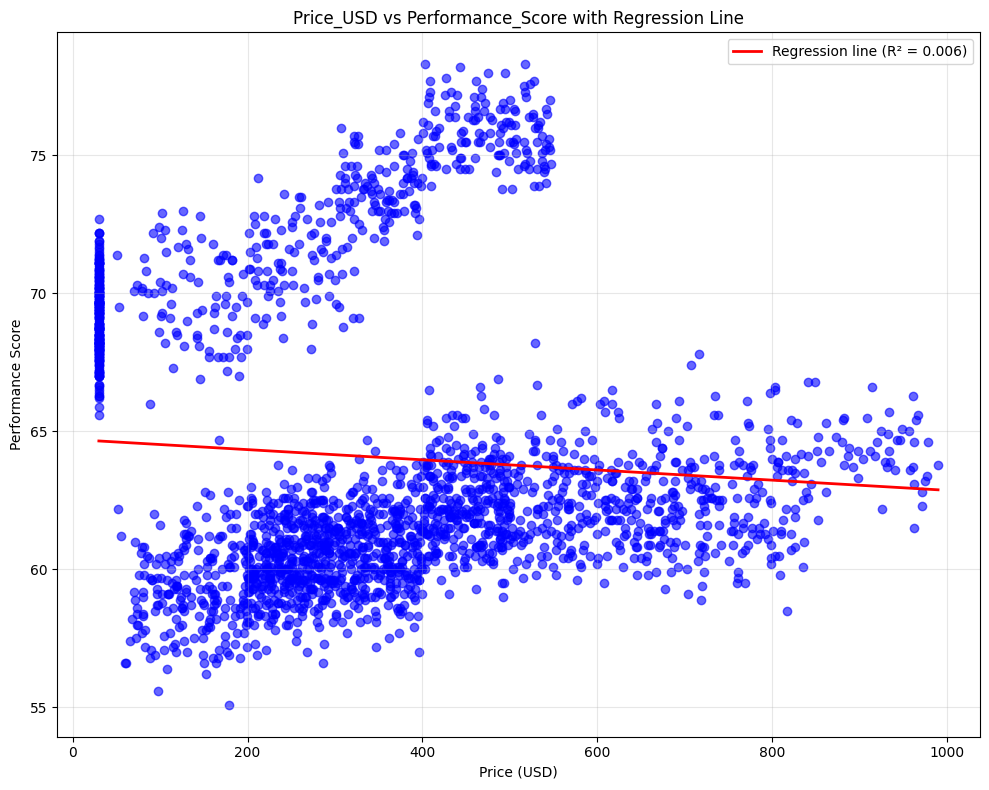

In [78]:
# Question 67: Scatter plot of Price_USD vs Performance_Score with regression line
print("Question 67: Scatter plot of Price_USD vs Performance_Score with regression line")

plt.figure(figsize=(10, 8))
plt.scatter(df['price_usd'], df['performance_score'], alpha=0.6, color='blue')

# Calculate and plot regression line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(df['price_usd'].dropna(), 
                                                        df[df['price_usd'].notna()]['performance_score'])

x_line = np.linspace(df['price_usd'].min(), df['price_usd'].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Regression line (R² = {r_value**2:.3f})')

plt.xlabel('Price (USD)')
plt.ylabel('Performance Score')
plt.title('Price_USD vs Performance_Score with Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Question 68: Scatter plot of Battery_Life_Hours vs User_Satisfaction_Rating with regression line


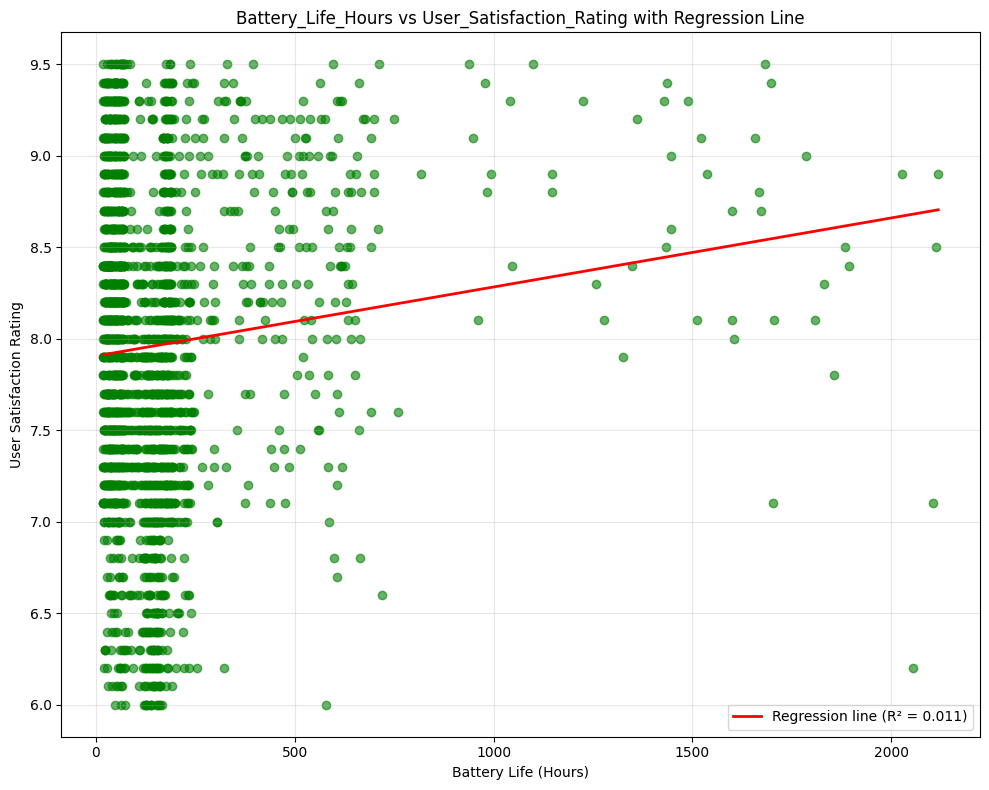

In [79]:
# Question 68: Scatter plot of Battery_Life_Hours vs User_Satisfaction_Rating with regression line
print("Question 68: Scatter plot of Battery_Life_Hours vs User_Satisfaction_Rating with regression line")

plt.figure(figsize=(10, 8))
plt.scatter(df['battery_life_hours'], df['user_satisfaction_rating'], alpha=0.6, color='green')

# Calculate and plot regression line
slope, intercept, r_value, p_value, std_err = linregress(df['battery_life_hours'].dropna(), 
                                                        df[df['battery_life_hours'].notna()]['user_satisfaction_rating'])

x_line = np.linspace(df['battery_life_hours'].min(), df['battery_life_hours'].max(), 100)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line, 'r-', linewidth=2, label=f'Regression line (R² = {r_value**2:.3f})')

plt.xlabel('Battery Life (Hours)')
plt.ylabel('User Satisfaction Rating')
plt.title('Battery_Life_Hours vs User_Satisfaction_Rating with Regression Line')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## (H). GROUPING AND AGGREGATION

In [80]:
# Question 69: Average Price_USD for each Category
print("Question 69: Average Price_USD for each Category")

avg_price_by_category = df.groupby('category')['price_usd'].mean().sort_values(ascending=False)
print(avg_price_by_category)

Question 69: Average Price_USD for each Category
category
Smartwatch         429.944146
Smart Ring         426.072987
Sports Watch       362.416647
Fitness Tracker    197.510294
Fitness Band        30.000000
Name: price_usd, dtype: float64


In [81]:
# Question 70: Average Battery_Life_Hours for each Brand
print("Question 70: Average Battery_Life_Hours for each Brand")

avg_battery_by_brand = df.groupby('brand')['battery_life_hours'].mean().sort_values(ascending=False)
print(avg_battery_by_brand)

Question 70: Average Battery_Life_Hours for each Brand
brand
Garmin      655.273282
Oura        179.987013
WHOOP       143.756277
Fitbit      132.640084
Amazfit     110.722845
Withings    104.575943
Polar        93.729796
Huawei       46.591220
Samsung      44.885171
Apple        44.001946
Name: battery_life_hours, dtype: float64


In [82]:
# Question 71: Average User_Satisfaction_Rating for each Water_Resistance_Rating
print("Question 71: Average User_Satisfaction_Rating for each Water_Resistance_Rating")

avg_satisfaction_by_water_resistance = df.groupby('water_resistance_rating')['user_satisfaction_rating'].mean().sort_values(ascending=False)
print(avg_satisfaction_by_water_resistance)

Question 71: Average User_Satisfaction_Rating for each Water_Resistance_Rating
water_resistance_rating
10ATM    8.455319
5ATM     8.116810
IP68     8.109558
IPX8     8.079815
IPX7     7.736328
3ATM     7.245299
IPX4     7.196203
Name: user_satisfaction_rating, dtype: float64


In [83]:
# Question 72: Maximum Performance_Score for each App_Ecosystem_Support category
print("Question 72: Maximum Performance_Score for each App_Ecosystem_Support category")

max_performance_by_app_ecosystem = df.groupby('app_ecosystem_support')['performance_score'].max().sort_values(ascending=False)
print(max_performance_by_app_ecosystem)

Question 72: Maximum Performance_Score for each App_Ecosystem_Support category
app_ecosystem_support
Android/iOS       78.3
Cross-platform    78.3
iOS               64.4
Name: performance_score, dtype: float64


In [84]:
# Question 73: Minimum Heart_Rate_Accuracy_Percent for each Category
print("Question 73: Minimum Heart_Rate_Accuracy_Percent for each Category")

min_hr_accuracy_by_category = df.groupby('category')['heart_rate_accuracy_percent'].min().sort_values()
print(min_hr_accuracy_by_category)

Question 73: Minimum Heart_Rate_Accuracy_Percent for each Category
category
Smart Ring         85.01
Fitness Band       85.02
Fitness Tracker    88.02
Smartwatch         92.01
Sports Watch       92.03
Name: heart_rate_accuracy_percent, dtype: float64


In [85]:
# Question 74: Mean Step_Count_Accuracy_Percent by Brand
print("Question 74: Mean Step_Count_Accuracy_Percent by Brand")

mean_step_accuracy_by_brand = df.groupby('brand')['step_count_accuracy_percent'].mean().sort_values(ascending=False)
print(mean_step_accuracy_by_brand)

Question 74: Mean Step_Count_Accuracy_Percent by Brand
brand
Garmin      98.731947
Apple       97.283930
Samsung     97.175323
Polar       95.137918
Fitbit      95.090211
Withings    95.040047
WHOOP       95.023593
Huawei      95.011220
Amazfit     94.938491
Oura        94.860303
Name: step_count_accuracy_percent, dtype: float64


In [86]:
# Question 75: Median Sleep_Tracking_Accuracy_Percent by Category
print("Question 75: Median Sleep_Tracking_Accuracy_Percent by Category")

median_sleep_accuracy_by_category = df.groupby('category')['sleep_tracking_accuracy_percent'].median().sort_values(ascending=False)
print(median_sleep_accuracy_by_category)

Question 75: Median Sleep_Tracking_Accuracy_Percent by Category
category
Smart Ring         88.64
Smartwatch         79.77
Fitness Tracker    75.46
Fitness Band       75.07
Sports Watch       74.91
Name: sleep_tracking_accuracy_percent, dtype: float64


In [87]:
# Question 76: Total count of devices by Connectivity_Features
print("Question 76: Total count of devices by Connectivity_Features")

device_count_by_connectivity = df.groupby('connectivity_features').size().sort_values(ascending=False)
print(device_count_by_connectivity)

Question 76: Total count of devices by Connectivity_Features
connectivity_features
Bluetooth                    906
WiFi, Bluetooth, NFC, LTE    617
WiFi, Bluetooth, NFC         613
Bluetooth, WiFi              239
dtype: int64


In [88]:
# Question 77: Average Price_USD by App_Ecosystem_Support
print("Question 77: Average Price_USD by App_Ecosystem_Support")

avg_price_by_app_ecosystem = df.groupby('app_ecosystem_support')['price_usd'].mean().sort_values(ascending=False)
print(avg_price_by_app_ecosystem)

Question 77: Average Price_USD by App_Ecosystem_Support
app_ecosystem_support
iOS               525.029494
Cross-platform    341.912920
Android/iOS       335.241956
Name: price_usd, dtype: float64


In [89]:
# Question 78: Standard deviation of Battery_Life_Hours by Water_Resistance_Rating
print("Question 78: Standard deviation of Battery_Life_Hours by Water_Resistance_Rating")

std_battery_by_water_resistance = df.groupby('water_resistance_rating')['battery_life_hours'].std().sort_values(ascending=False)
print(std_battery_by_water_resistance)

Question 78: Standard deviation of Battery_Life_Hours by Water_Resistance_Rating
water_resistance_rating
10ATM    574.053537
5ATM     310.076862
IPX8     131.774107
IP68     129.529409
3ATM      33.880858
IPX4      33.140345
IPX7      28.180119
Name: battery_life_hours, dtype: float64


In [90]:
# Question 79: Check for duplicate rows
print("Question 79: How to check for duplicate rows in the dataset")

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Show the code used
print("\nCode used to check for duplicates:")
print("duplicate_count = df.duplicated().sum()")
print("print(f'Number of duplicate rows: {duplicate_count}')")

# More detailed analysis
if duplicate_count > 0:
    print(f"\nDuplicate rows found:")
    duplicate_rows = df[df.duplicated()]
    print(duplicate_rows.head())
else:
    print("\nNo duplicate rows found in the dataset.")

Question 79: How to check for duplicate rows in the dataset
Number of duplicate rows: 0

Code used to check for duplicates:
duplicate_count = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

No duplicate rows found in the dataset.


In [91]:
# Question 80: Remove duplicate rows
print("Question 80: Remove duplicate rows from the dataset")

initial_count = len(df)
df_no_duplicates = df.drop_duplicates()
final_count = len(df_no_duplicates)
duplicates_removed = initial_count - final_count

print(f"Initial number of rows: {initial_count}")
print(f"Final number of rows: {final_count}")
print(f"Number of duplicates removed: {duplicates_removed}")

print("\nCode used to remove duplicates:")
print("df_no_duplicates = df.drop_duplicates()")
print("duplicates_removed = len(df) - len(df_no_duplicates)")

# Update the main dataframe for subsequent analysis
df = df_no_duplicates

Question 80: Remove duplicate rows from the dataset
Initial number of rows: 2375
Final number of rows: 2375
Number of duplicates removed: 0

Code used to remove duplicates:
df_no_duplicates = df.drop_duplicates()
duplicates_removed = len(df) - len(df_no_duplicates)


## (I). ADVANCED ANALYSIS

In [92]:
# Question 81: Average Performance_Score for devices with Water_Resistance_Rating of 5ATM
print("Question 81: Average Performance_Score for devices with Water_Resistance_Rating of 5ATM")

avg_performance_5atm = df[df['water_resistance_rating'] == '5ATM']['performance_score'].mean()
print(f"Average Performance_Score for 5ATM devices: {avg_performance_5atm:.2f}")

# Also show count of such devices
count_5atm = len(df[df['water_resistance_rating'] == '5ATM'])
print(f"Number of devices with 5ATM rating: {count_5atm}")

Question 81: Average Performance_Score for devices with Water_Resistance_Rating of 5ATM
Average Performance_Score for 5ATM devices: 61.37
Number of devices with 5ATM rating: 583


In [93]:
# Question 82: Average User_Satisfaction_Rating for devices with Bluetooth connectivity
print("Question 82: Average User_Satisfaction_Rating for devices with Connectivity_Features including Bluetooth")

bluetooth_devices = df[df['connectivity_features'].str.contains('Bluetooth', na=False)]
avg_satisfaction_bluetooth = bluetooth_devices['user_satisfaction_rating'].mean()

print(f"Average User_Satisfaction_Rating for Bluetooth devices: {avg_satisfaction_bluetooth:.2f}")

# Also show count of such devices
count_bluetooth = len(bluetooth_devices)
print(f"Number of devices with Bluetooth: {count_bluetooth}")

Question 82: Average User_Satisfaction_Rating for devices with Connectivity_Features including Bluetooth
Average User_Satisfaction_Rating for Bluetooth devices: 7.97
Number of devices with Bluetooth: 2375


In [94]:
# Question 83: Brand with highest average Heart_Rate_Accuracy_Percent
print("Question 83: Brand with highest average Heart_Rate_Accuracy_Percent")

avg_hr_by_brand = df.groupby('brand')['heart_rate_accuracy_percent'].mean().sort_values(ascending=False)
highest_hr_brand = avg_hr_by_brand.index[0]
highest_hr_value = avg_hr_by_brand.iloc[0]

print(f"Brand with highest average Heart_Rate_Accuracy_Percent: {highest_hr_brand}")
print(f"Average Heart_Rate_Accuracy_Percent: {highest_hr_value:.2f}%")

print("\nTop 5 brands by Heart Rate Accuracy:")
print(avg_hr_by_brand.head())

Question 83: Brand with highest average Heart_Rate_Accuracy_Percent
Brand with highest average Heart_Rate_Accuracy_Percent: Withings
Average Heart_Rate_Accuracy_Percent: 95.10%

Top 5 brands by Heart Rate Accuracy:
brand
Withings    95.102358
Huawei      95.090829
Polar       95.072816
Apple       95.026381
Samsung     94.989392
Name: heart_rate_accuracy_percent, dtype: float64


In [95]:
# Question 84: Category with lowest average Price_USD
print("Question 84: Category with lowest average Price_USD")

avg_price_by_category = df.groupby('category')['price_usd'].mean().sort_values()
lowest_price_category = avg_price_by_category.index[0]
lowest_price_value = avg_price_by_category.iloc[0]

print(f"Category with lowest average Price_USD: {lowest_price_category}")
print(f"Average Price_USD: ${lowest_price_value:.2f}")

print("\nAll categories by average price:")
print(avg_price_by_category)

Question 84: Category with lowest average Price_USD
Category with lowest average Price_USD: Fitness Band
Average Price_USD: $30.00

All categories by average price:
category
Fitness Band        30.000000
Fitness Tracker    197.510294
Sports Watch       362.416647
Smart Ring         426.072987
Smartwatch         429.944146
Name: price_usd, dtype: float64


In [104]:
# Question 85: Pivot table showing average Performance_Score by Brand and Category
print("Question 85: Pivot table showing average Performance_Score by Brand and Category")

pivot_performance = df.pivot_table(values='performance_score', 
                                 index='brand', 
                                 columns='category', 
                                 aggfunc='mean')

print(pivot_performance)



Question 85: Pivot table showing average Performance_Score by Brand and Category
category  Fitness Band  Fitness Tracker  Smart Ring  Smartwatch  Sports Watch
brand                                                                        
Amazfit            NaN        70.264815         NaN   59.357647     60.109677
Apple              NaN              NaN         NaN   61.366926           NaN
Fitbit             NaN        70.634483         NaN   59.327586     60.344444
Garmin             NaN              NaN         NaN   64.197692     63.292424
Huawei             NaN              NaN         NaN   60.827805           NaN
Oura               NaN              NaN   75.015584         NaN           NaN
Polar              NaN              NaN         NaN   60.434586     61.521429
Samsung            NaN              NaN         NaN   61.374905           NaN
WHOOP        69.087446              NaN         NaN         NaN           NaN
Withings           NaN              NaN         NaN   60.6030

In [103]:
# Question 86: Pivot table showing count of devices by Water_Resistance_Rating and App_Ecosystem_Support
print("Question 86: Pivot table showing count of devices by Water_Resistance_Rating and App_Ecosystem_Support")

pivot_count = df.pivot_table(values='device_name', 
                           index='water_resistance_rating', 
                           columns='app_ecosystem_support', 
                           aggfunc='count', 
                           fill_value=0)

print(pivot_count)



Question 86: Pivot table showing count of devices by Water_Resistance_Rating and App_Ecosystem_Support
app_ecosystem_support    Android/iOS  Cross-platform  iOS
water_resistance_rating                                  
10ATM                              0              47    0
3ATM                              39              78    0
5ATM                             167             326   90
IP68                             192             281   92
IPX4                              62              96    0
IPX7                             106             150    0
IPX8                             247             327   75


In [98]:
# Question 87: Average GPS_Accuracy_Meters for devices with Health_Sensors_Count > 8
print("Question 87: Average GPS_Accuracy_Meters for devices with Health_Sensors_Count > 8")

high_sensor_devices = df[df['health_sensors_count'] > 8]
avg_gps_high_sensors = high_sensor_devices['gps_accuracy_meters'].mean()

print(f"Average GPS_Accuracy_Meters for devices with >8 health sensors: {avg_gps_high_sensors:.2f} meters")

# Also show count of such devices
count_high_sensors = len(high_sensor_devices)
print(f"Number of devices with >8 health sensors: {count_high_sensors}")

Question 87: Average GPS_Accuracy_Meters for devices with Health_Sensors_Count > 8
Average GPS_Accuracy_Meters for devices with >8 health sensors: 3.24 meters
Number of devices with >8 health sensors: 1332


In [99]:
# Question 88: Count of devices with User_Satisfaction_Rating above 9.0
print("Question 88: Number of devices with User_Satisfaction_Rating above 9.0")

high_satisfaction_count = len(df[df['user_satisfaction_rating'] > 9.0])
total_devices = len(df)
percentage = (high_satisfaction_count / total_devices) * 100

print(f"Number of devices with User_Satisfaction_Rating > 9.0: {high_satisfaction_count}")
print(f"Percentage of total devices: {percentage:.2f}%")

Question 88: Number of devices with User_Satisfaction_Rating above 9.0
Number of devices with User_Satisfaction_Rating > 9.0: 284
Percentage of total devices: 11.96%


Question 89: Distribution of Health_Sensors_Count across all devices


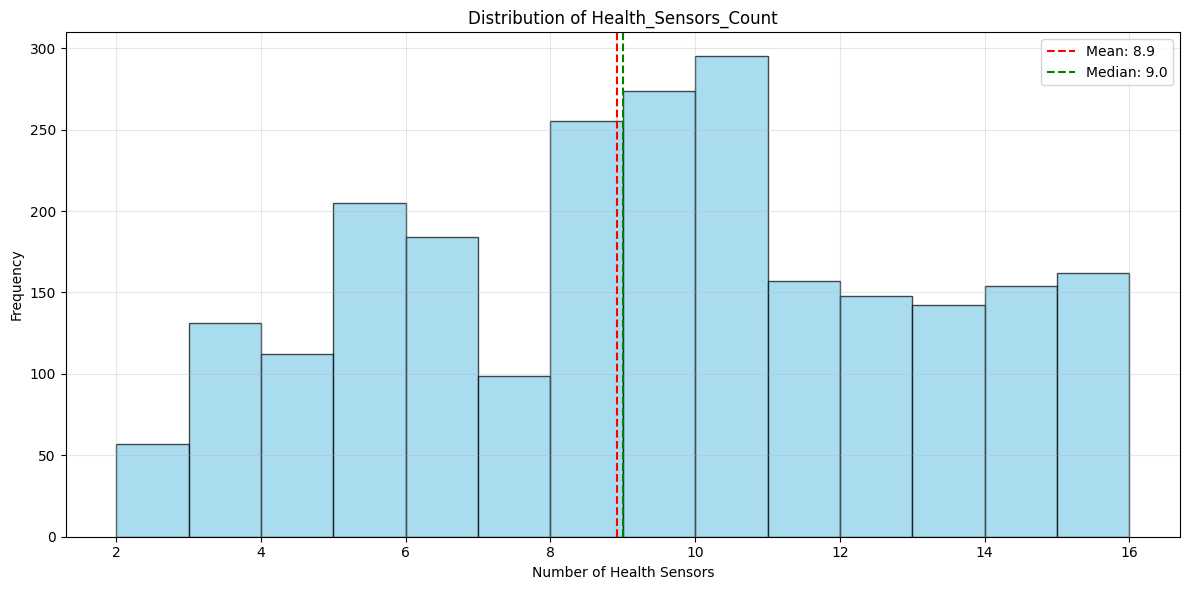


Value counts for Health_Sensors_Count:
health_sensors_count
2      57
3     131
4     112
5     205
6     184
7      99
8     255
9     274
10    295
11    157
12    148
13    142
14    154
15    162
Name: count, dtype: int64


In [100]:
# Question 89: Distribution of Health_Sensors_Count with histogram
print("Question 89: Distribution of Health_Sensors_Count across all devices")

plt.figure(figsize=(12, 6))
plt.hist(df['health_sensors_count'], bins=range(int(df['health_sensors_count'].min()), 
                                               int(df['health_sensors_count'].max()) + 2), 
         alpha=0.7, color='skyblue', edgecolor='black')

plt.title('Distribution of Health_Sensors_Count')
plt.xlabel('Number of Health Sensors')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add statistics
mean_sensors = df['health_sensors_count'].mean()
median_sensors = df['health_sensors_count'].median()
plt.axvline(mean_sensors, color='red', linestyle='--', label=f'Mean: {mean_sensors:.1f}')
plt.axvline(median_sensors, color='green', linestyle='--', label=f'Median: {median_sensors:.1f}')
plt.legend()

plt.tight_layout()
plt.show()

# Show value counts
print("\nValue counts for Health_Sensors_Count:")
print(df['health_sensors_count'].value_counts().sort_index())

Question 90: Violin plot showing distribution of Performance_Score by Category


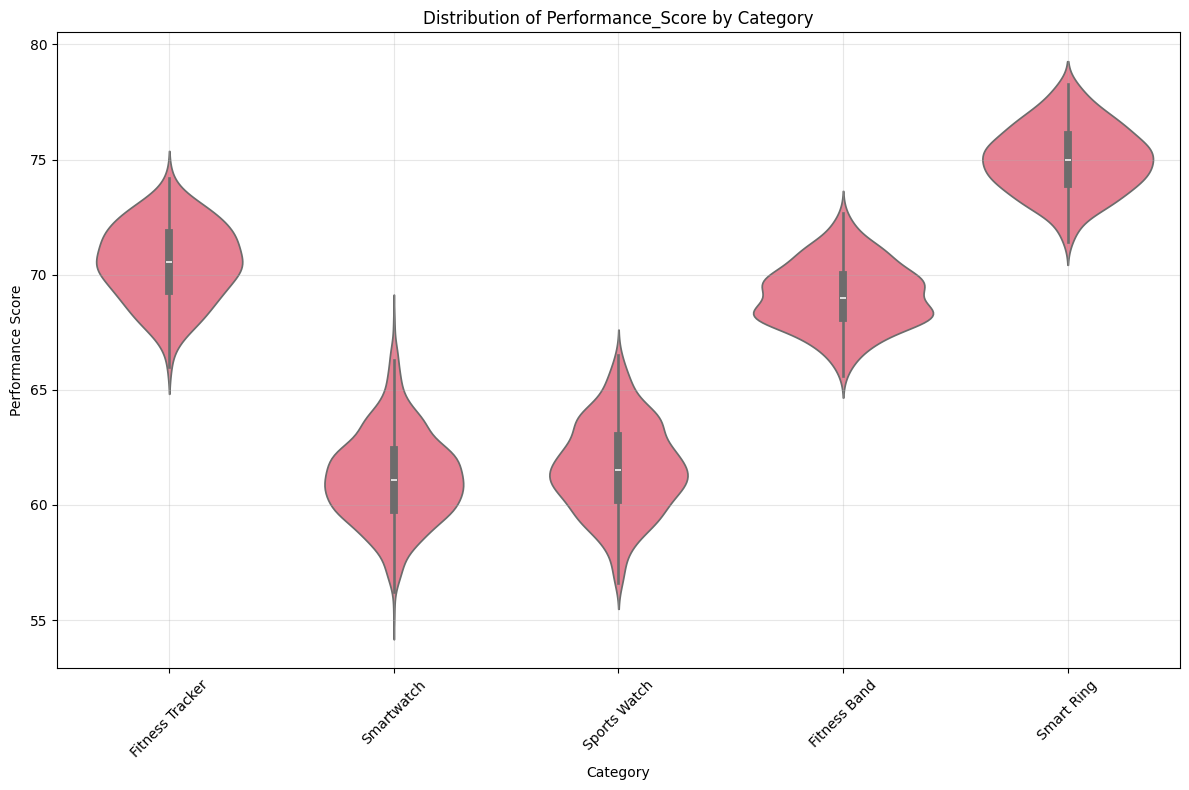

In [102]:
# Question 90: Violin plot of Performance_Score by Category
print("Question 90: Violin plot showing distribution of Performance_Score by Category")

plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='category', y='performance_score')
plt.title('Distribution of Performance_Score by Category')
plt.xlabel('Category')
plt.ylabel('Performance Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

